In [75]:
#1. Import dataset
import pandas as pd
df= pd.read_csv("Metabolic Syndrome.csv")
df

seqn  Age     Sex  Marital  Income         Race  WaistCirc   BMI  \
0     62161   22    Male   Single  8200.0        White       81.0  23.3   
1     62164   44  Female  Married  4500.0        White       80.1  23.2   
2     62169   21    Male   Single   800.0        Asian       69.6  20.1   
3     62172   43  Female   Single  2000.0        Black      120.4  33.3   
4     62177   51    Male  Married     NaN        Asian       81.1  20.1   
...     ...  ...     ...      ...     ...          ...        ...   ...   
2396  71901   48  Female  Married  1000.0        Other        NaN  59.7   
2397  71904   30  Female   Single  2000.0        Asian        NaN  18.0   
2398  71909   28    Male   Single   800.0  MexAmerican      100.8  29.4   
2399  71911   27    Male  Married  8200.0  MexAmerican      106.6  31.3   
2400  71915   60    Male   Single  6200.0        White      106.6  27.5   

      Albuminuria  UrAlbCr  UricAcid  BloodGlucose  HDL  Triglycerides  \
0               0     3.88       4.9            92   41             84   
1               0     8.55       4.5            82   28             56   
2               0     5.07       5.4           107   43             78   
3               0     5.22       5.0           104   73            141   
4               0     8.13       5.0            95   43            126   
...           ...      ...       ...           ...  ...            ...   
2396            0    22.11       5.8           152   57            107   
2397            0     2.90       7.9            91   90             91   
2398            0     2.78       6.2            99   47             84   
2399            0     4.15       6.2           100   41            124   
2400            0    12.82       5.2            91   36            226   

      MetabolicSyndrome  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
2396                  0  
2397                  0  
2398                  0  
2399                  1  
2400                  1  

[2401 rows x 15 columns]

In [76]:
# 2. Check the dimension of the dataset
print("Dataset dimensions (rows, columns):", df.shape)

Dataset dimensions (rows, columns): (2401, 15)


In [77]:
# 3. Check for duplicates
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [78]:
# 4. Check data types of variables
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome      int64
dtype: object


In [79]:
#5. For a more detailed overview including non-null counts
print("\nDetailed info:")
print(df.info())


Detailed info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   seqn               2401 non-null   int64  
 1   Age                2401 non-null   int64  
 2   Sex                2401 non-null   object 
 3   Marital            2193 non-null   object 
 4   Income             2284 non-null   float64
 5   Race               2401 non-null   object 
 6   WaistCirc          2316 non-null   float64
 7   BMI                2375 non-null   float64
 8   Albuminuria        2401 non-null   int64  
 9   UrAlbCr            2401 non-null   float64
 10  UricAcid           2401 non-null   float64
 11  BloodGlucose       2401 non-null   int64  
 12  HDL                2401 non-null   int64  
 13  Triglycerides      2401 non-null   int64  
 14  MetabolicSyndrome  2401 non-null   int64  
dtypes: float64(5), int64(7), object(3)
memory usage: 281.5+ 

In [80]:
#6. Identify object type columns
object_cols = df.select_dtypes(include=['object']).columns

# Convert object type columns to category
df[object_cols] = df[object_cols].astype('category')

# Verify the conversion
print("Data types after conversion:")
print(df.dtypes)

# Optional: Show memory usage before and after conversion
print("\nMemory usage before conversion:", df.memory_usage(deep=True).sum()/1024, "KB")

Data types after conversion:
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
WaistCirc             float64
BMI                   float64
Albuminuria             int64
UrAlbCr               float64
UricAcid              float64
BloodGlucose            int64
HDL                     int64
Triglycerides           int64
MetabolicSyndrome       int64
dtype: object

Memory usage before conversion: 233.404296875 KB


In [81]:
#7. Convert data types
df[['Albuminuria', 'MetabolicSyndrome']] = df[['Albuminuria', 'MetabolicSyndrome']].astype('category')
# Verify the conversion
print("Data types after conversion:")
print(df.dtypes)

Data types after conversion:
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
WaistCirc             float64
BMI                   float64
Albuminuria          category
UrAlbCr               float64
UricAcid              float64
BloodGlucose            int64
HDL                     int64
Triglycerides           int64
MetabolicSyndrome    category
dtype: object


In [82]:
#8. Split the dataset
from sklearn.model_selection import train_test_split

# Split the dataset into training (70%) and testing (30%) while preserving all columns
train_set, test_set = train_test_split(
    df,                # Entire DataFrame (features + target)
    test_size=0.2,           # 20% for testing
    random_state=42,         # Reproducibility
    stratify=df['MetabolicSyndrome']  # Ensures class balance
)

# Verify shapes
print("Training set shape:", train_set.shape)
print("Testing set shape:", test_set.shape)

# Check class distribution (optional)
print("\nClass balance in Training set:")
print(train_set['MetabolicSyndrome'].value_counts(normalize=True))

print("\nClass balance in Testing set:")
print(test_set['MetabolicSyndrome'].value_counts(normalize=True))

Training set shape: (1920, 15)
Testing set shape: (481, 15)

Class balance in Training set:
MetabolicSyndrome
0    0.657813
1    0.342187
Name: proportion, dtype: float64

Class balance in Testing set:
MetabolicSyndrome
0    0.656965
1    0.343035
Name: proportion, dtype: float64


In [83]:
# 9. Check for missing values
print("\nMissing values per column(train):")
print(train_set.isnull().sum())
print("\nMissing values per column(test):")
print(test_set.isnull().sum())


Missing values per column(train):
seqn                   0
Age                    0
Sex                    0
Marital              165
Income                95
Race                   0
WaistCirc             65
BMI                   23
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

Missing values per column(test):
seqn                  0
Age                   0
Sex                   0
Marital              43
Income               22
Race                  0
WaistCirc            20
BMI                   3
Albuminuria           0
UrAlbCr               0
UricAcid              0
BloodGlucose          0
HDL                   0
Triglycerides         0
MetabolicSyndrome     0
dtype: int64


In [84]:
# 10. Remove missing values if they exist
if train_set.isnull().sum().sum() > 0:
    train_set_clean = train_set.dropna()
    print(f"\nRemoved {len(train_set) - len(train_set_clean)} rows with missing values")
    print("New dimensions after removal(train):", train_set_clean.shape)
else:
    print("\nNo missing values found in the dataset")
    train_set_clean = train_set.copy()

# If you want to keep working with the cleaned dataframe, use train_set_clean

if test_set.isnull().sum().sum() > 0:
    test_set_clean = test_set.dropna()
    print(f"\nRemoved {len(test_set) - len(test_set_clean)} rows with missing values")
    print("New dimensions after removal(test):", test_set_clean.shape)
else:
    print("\nNo missing values found in the dataset")
    test_set_clean = test_set.copy()

# If you want to keep working with the cleaned dataframe, use test_set_clean


Removed 311 rows with missing values
New dimensions after removal(train): (1609, 15)

Removed 81 rows with missing values
New dimensions after removal(test): (400, 15)


In [85]:
# 11. Check the dimension of the clean datasets
print("Clean Dataset dimensions (rows, columns):", train_set_clean.shape)
print("Clean Dataset dimensions (rows, columns):", test_set_clean.shape)

Clean Dataset dimensions (rows, columns): (1609, 15)
Clean Dataset dimensions (rows, columns): (400, 15)


In [86]:
print("Data types(train_set_clean):")
print(train_set_clean.dtypes)

Data types(train_set_clean):
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
WaistCirc             float64
BMI                   float64
Albuminuria          category
UrAlbCr               float64
UricAcid              float64
BloodGlucose            int64
HDL                     int64
Triglycerides           int64
MetabolicSyndrome    category
dtype: object


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_7952\148097871.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_set_clean, x=col, palette='viridis')
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_7952\148097871.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_set_clean, x=col, palette='viridis')
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_7952\148097871.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_set_clean, x=col, palette='viridis')
C:\Users\Ashani Madushani\Ap

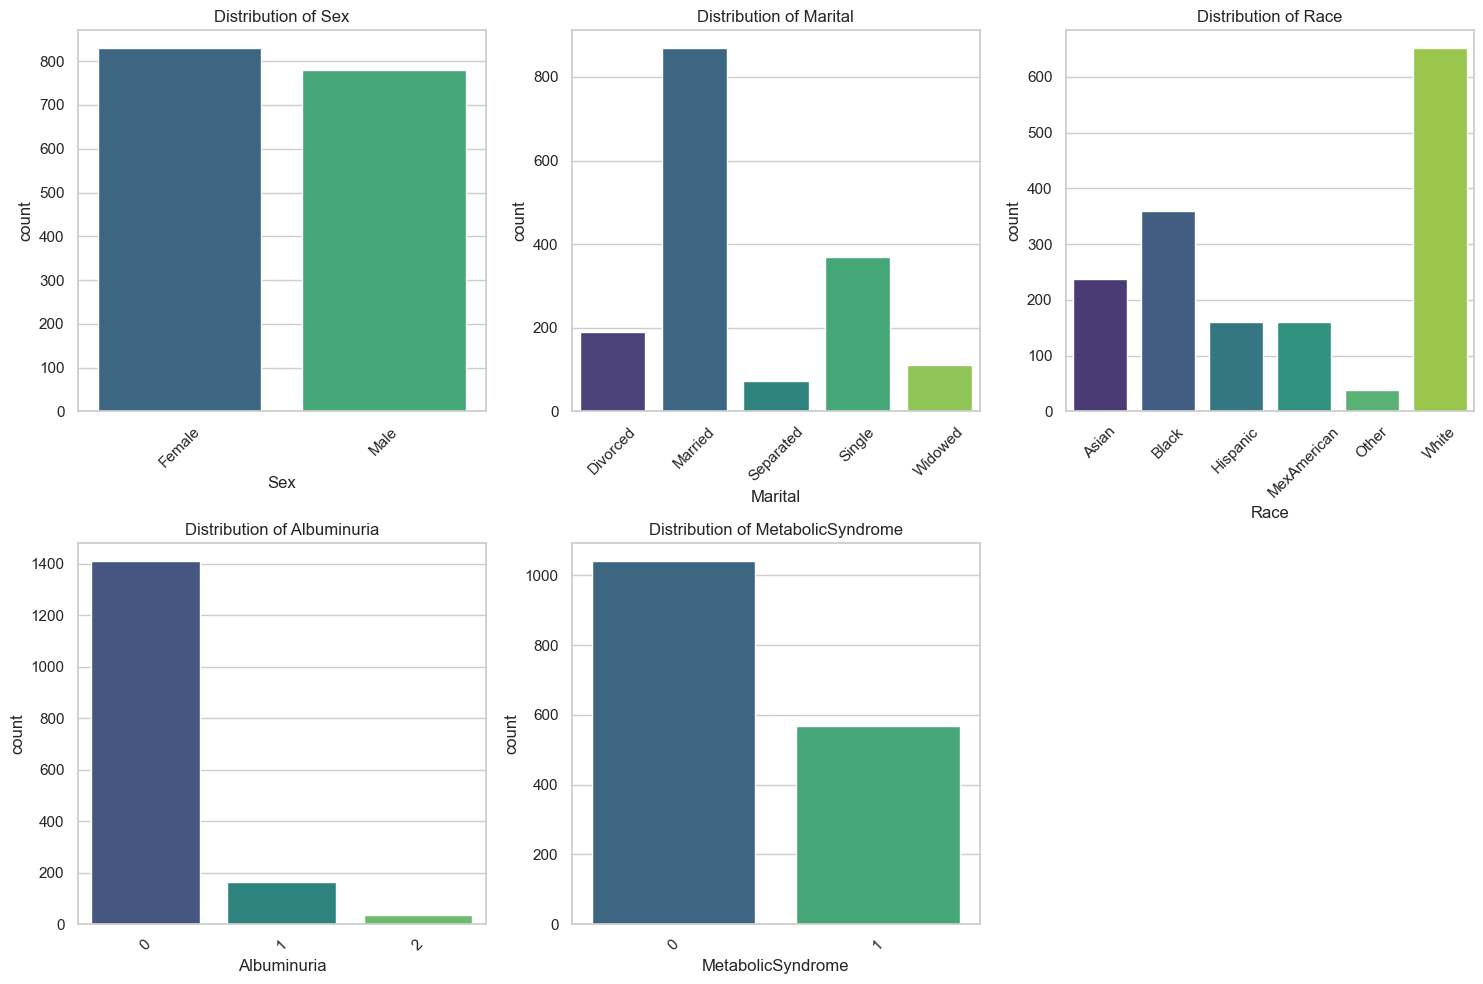

In [87]:
#12. Draw a bar graph for categorical variables
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select categorical columns
cat_cols = train_set_clean.select_dtypes(include=['category']).columns  # Fixed: Removed extra quote

# 2. Set up subplots
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(cat_cols) // n_cols + 1 ) # Fixed: Added missing parenthesis
plt.figure(figsize=(15, 5 * n_rows))  # Adjust figure size dynamically

# 3. Plot bar graphs for each categorical variable
for i, col in enumerate(cat_cols, 1):  # Fixed: Changed 'i' to '1' (start index)
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=train_set_clean, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')  # Fixed: Replaced curly quote with standard quote
    plt.xticks(rotation=45)  # Rotate x-labels for readability
    plt.tight_layout()  # Prevent overlapping

plt.show()

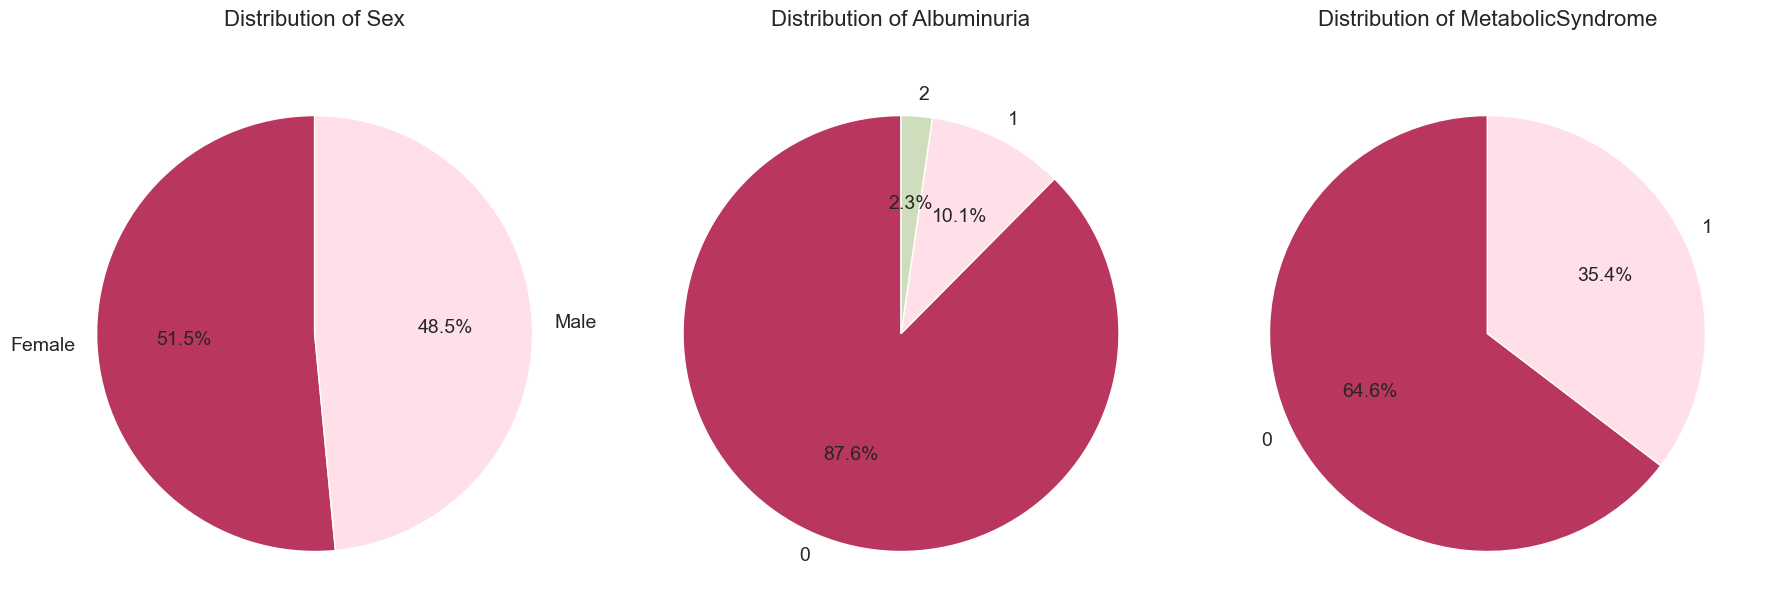

In [88]:
#13. Draw a pie charts for Sex, Albuminuria and MetabolicSyndrome
import matplotlib.pyplot as plt

# List of categorical columns to plot
cols = ['Sex', 'Albuminuria', 'MetabolicSyndrome']

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Create a pie chart for each specified column
for ax, col in zip(axes, cols):
    # Get value counts and labels
    counts = train_set_clean[col].value_counts()
    labels = counts.index.astype(str)
    
    # Plot pie chart
    ax.pie(counts, 
           labels=labels, 
           autopct='%1.1f%%', 
           startangle=90, 
           colors=['#B9375E','#ffe0e9','#ceddbb'],
           textprops={'fontsize': 14}) 
    #ax.pie(counts, labels=labels, autopct='%1.1f%%', 
           #startangle=90, colors = ['#B9375E','#ffe0e9','#ceddbb'])
    ax.set_title(f'Distribution of {col}', y=1.05,fontsize=16)

plt.tight_layout()
plt.show()

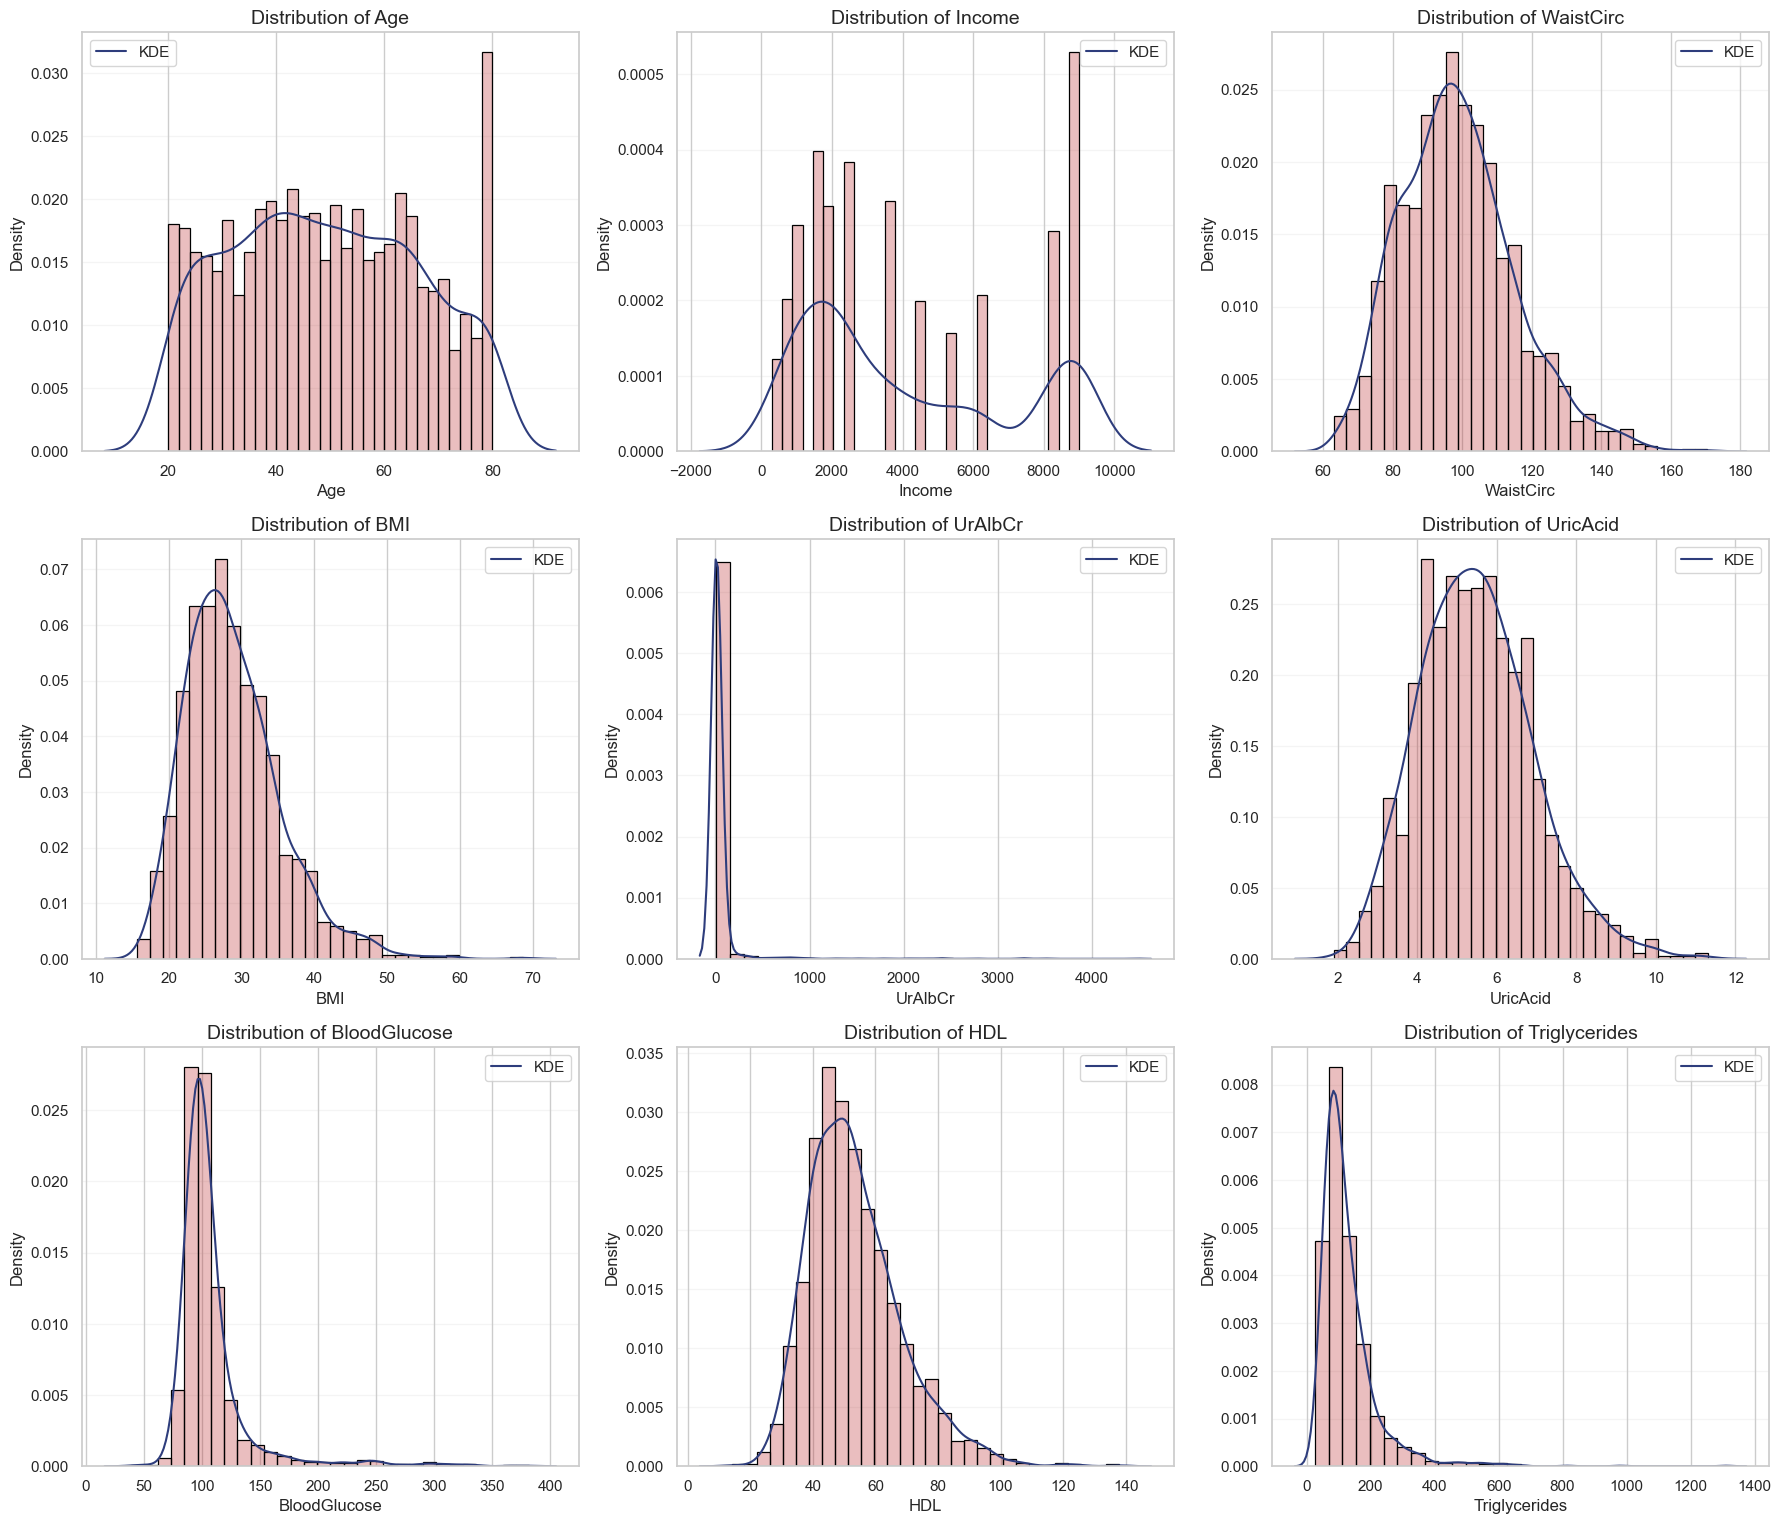

In [89]:
#14 Draw a histograms + KDE plots for numerical variables 
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns, excluding 'seqn' and categorical variables
num_cols = train_set_clean.select_dtypes(include=['int64', 'float64']).columns.drop('seqn')

# Set up subplots
n_cols = 3
n_rows = (len(num_cols) // n_cols + 1)
plt.figure(figsize=(18, 5 * n_rows))

# Create combined plots
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    
    # Plot histogram (transparent)
    sns.histplot(data=train_set_clean, x=col, kde=False,
                 bins=30, color='#ba292b', 
                 edgecolor='black', alpha=0.3,  # More transparent
                 stat='density')  # Match KDE scale
    
    # Plot KDE (bold line)
    sns.kdeplot(data=train_set_clean, x=col,
                color='#2e3d7c', linewidth=1.5,
                label='KDE')
    
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.grid(axis='y', alpha=0.2)
    plt.legend()

plt.tight_layout()
plt.show()

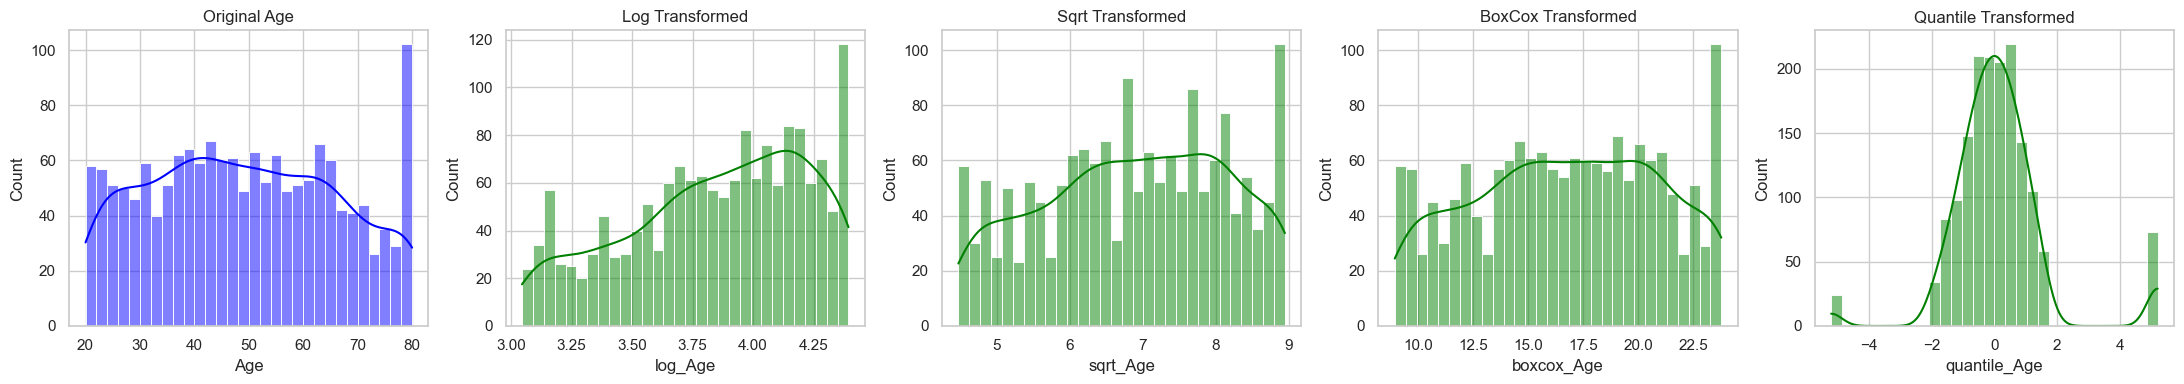

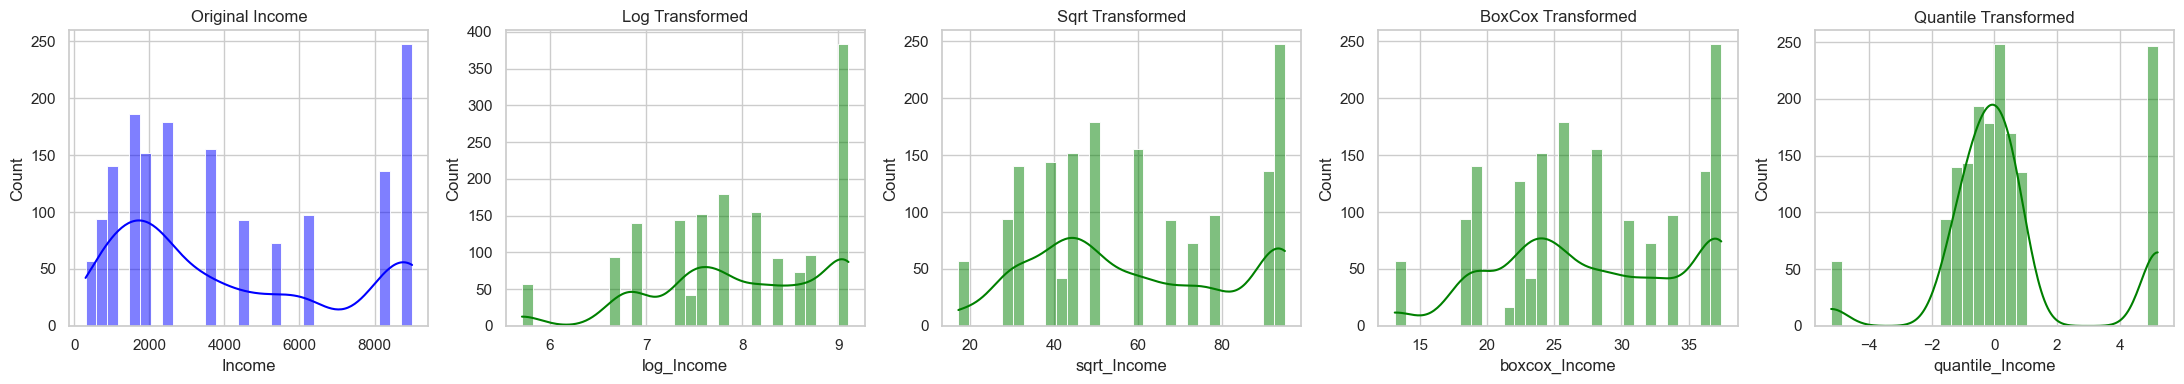

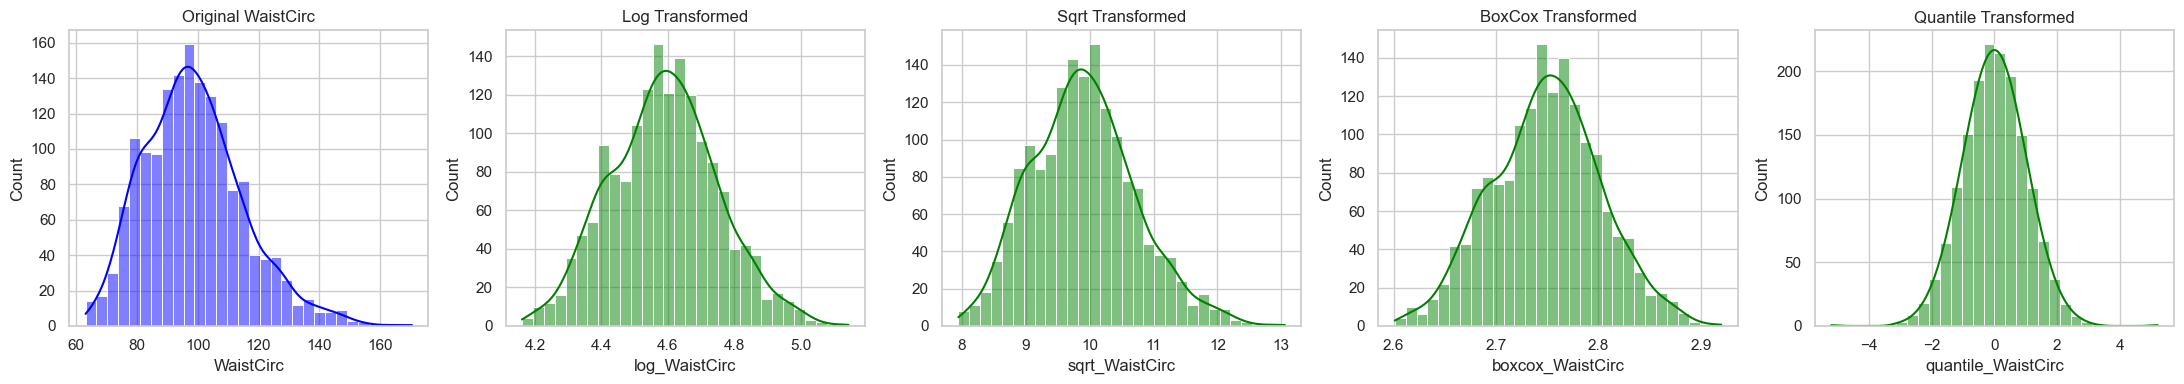

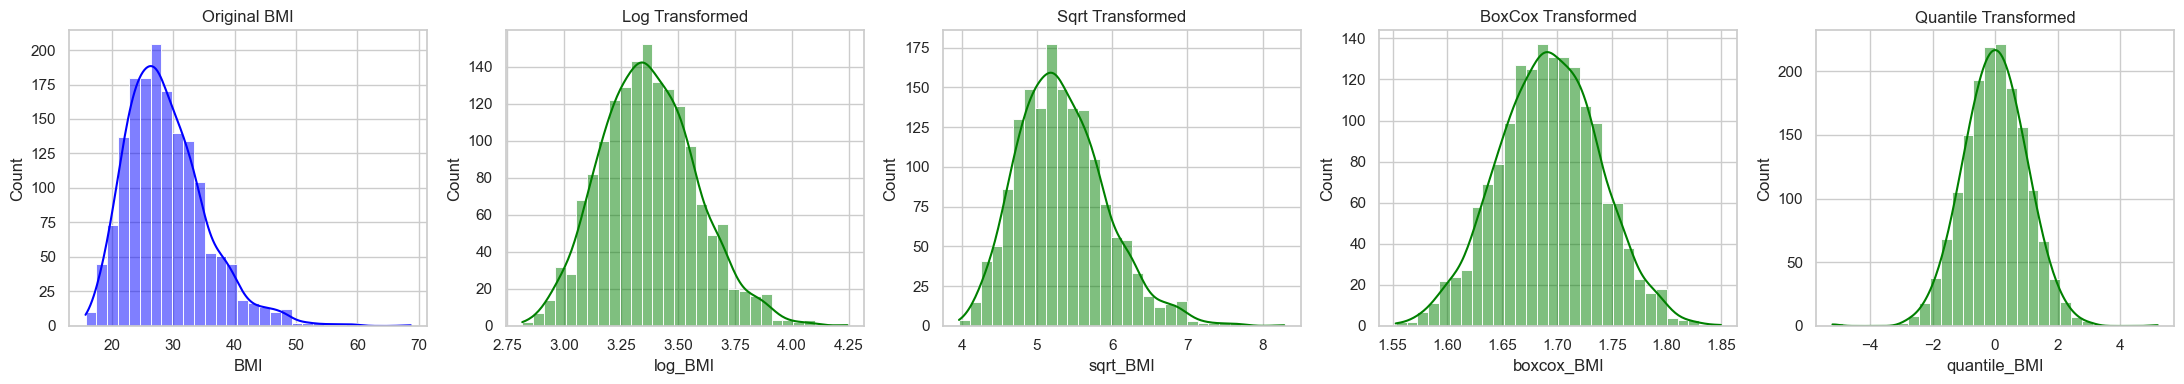

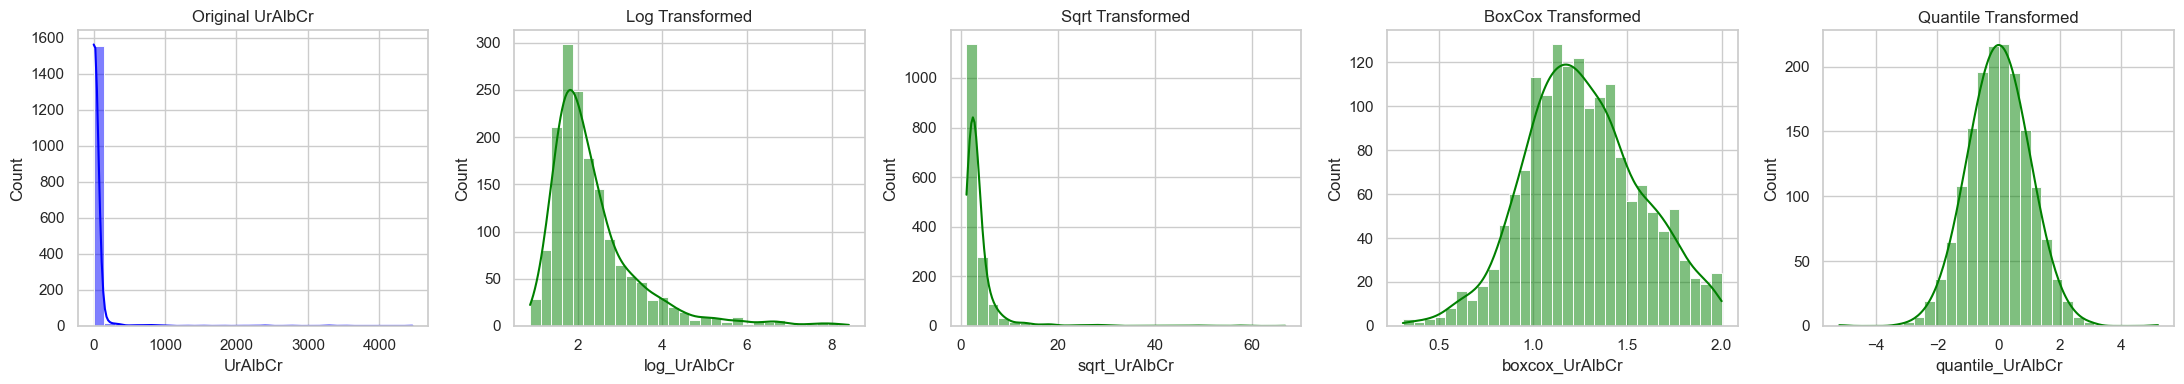

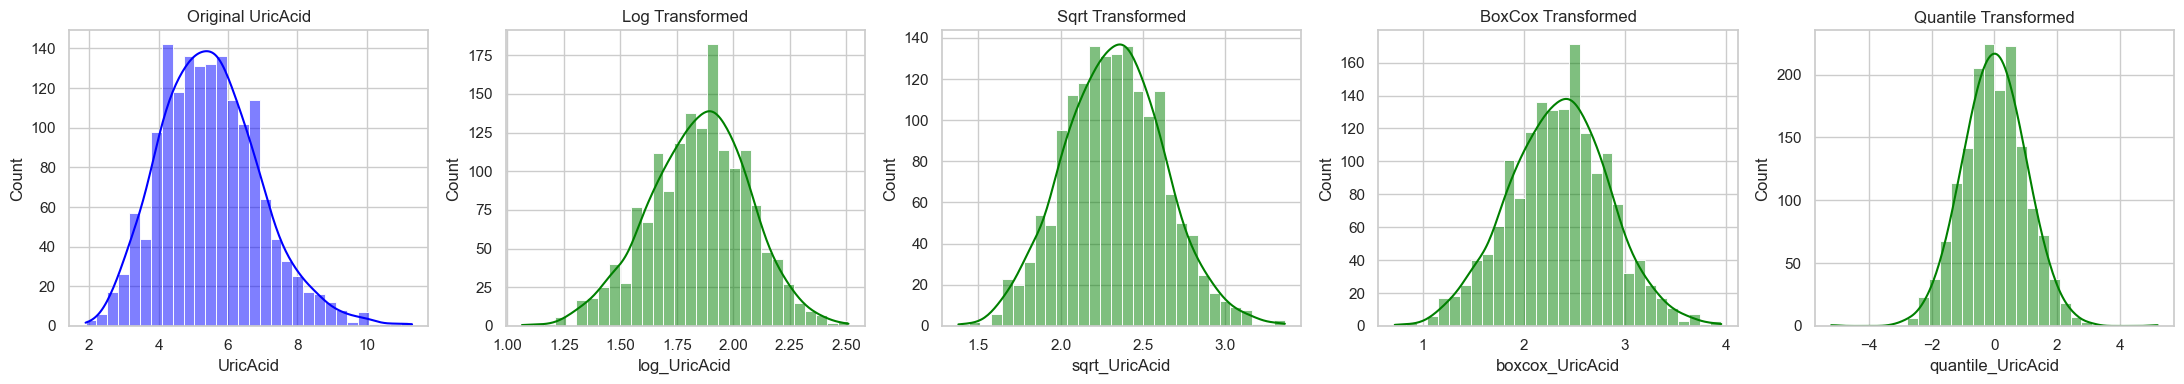

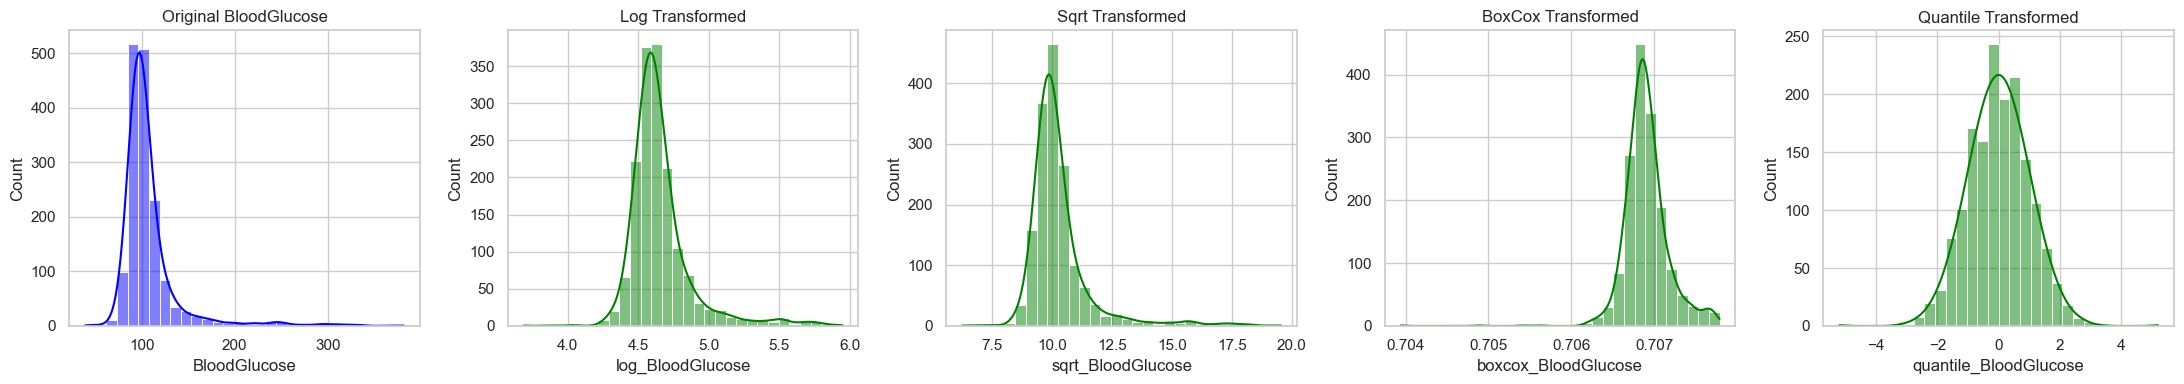

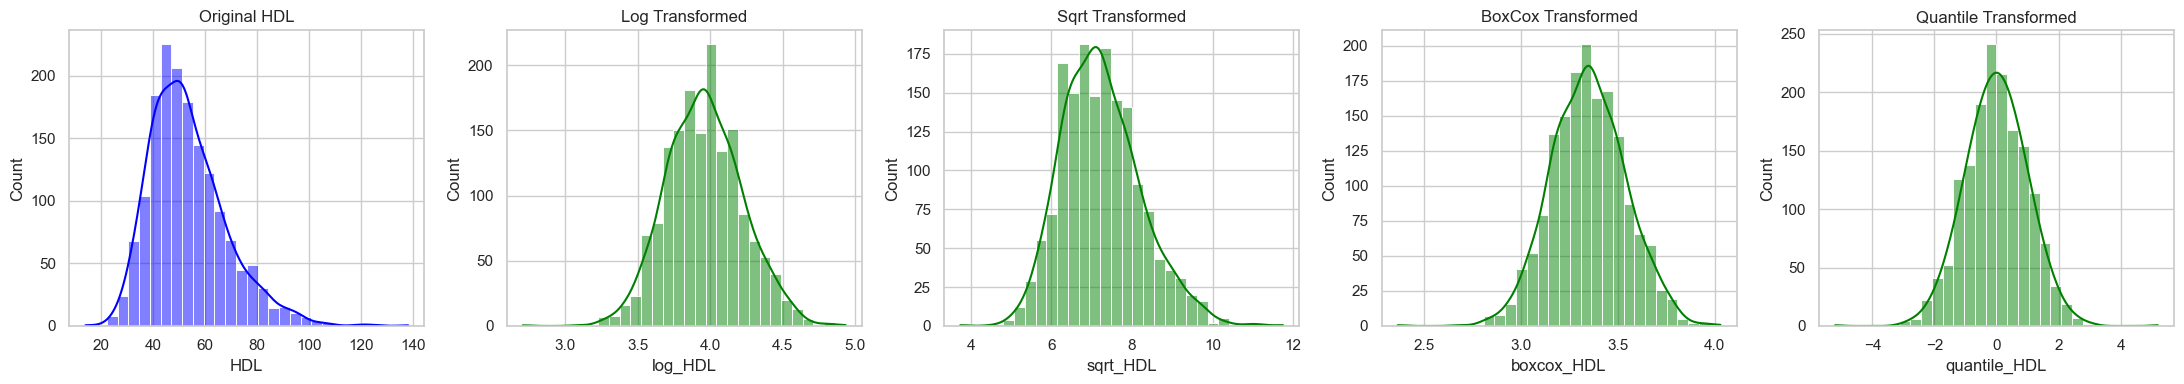

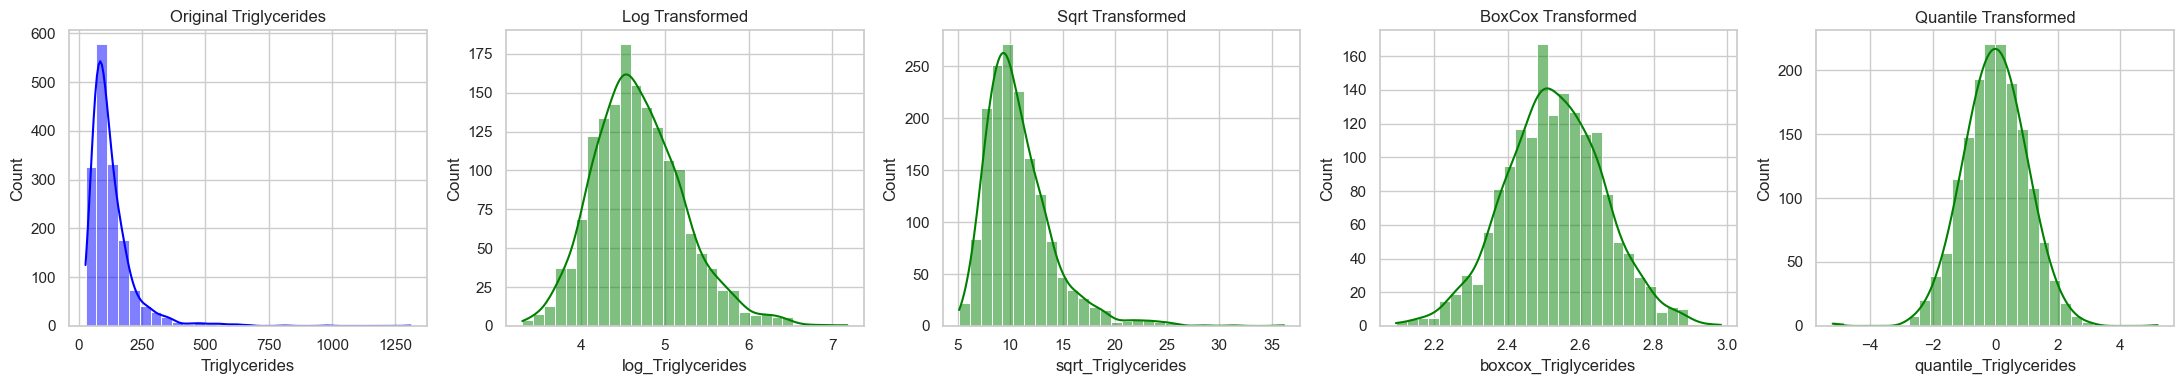

In [90]:
#15. Apply different transformations on numerical variables
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (excluding 'seqn' and categorical variables)
num_cols = train_set_clean.select_dtypes(include=['int64', 'float64']).columns.drop('seqn')

# Initialize transformed DataFrames
log_transformed = pd.DataFrame()
sqrt_transformed = pd.DataFrame()
boxcox_transformed = pd.DataFrame()
quantile_transformed = pd.DataFrame()  # New DataFrame for quantile transforms

# Initialize QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# Apply transformations to all numerical variables
for col in num_cols:
    # Log Transformation (add 1 to handle zeros)
    log_transformed[f'log_{col}'] = np.log1p(train_set_clean[col])
    
    # Square Root Transformation
    sqrt_transformed[f'sqrt_{col}'] = np.sqrt(train_set_clean[col])
    
    # Box-Cox Transformation (requires positive values)
    if (train_set_clean[col] > 0).all():
        boxcox_transformed[f'boxcox_{col}'], _ = stats.boxcox(train_set_clean[col])
    else:
        # Shift data to positive range if needed
        shifted = train_set_clean[col] - train_set_clean[col].min() + 1
        boxcox_transformed[f'boxcox_{col}'], _ = stats.boxcox(shifted)
    
    # Quantile Transformation (new)
    quantile_transformed[f'quantile_{col}'] = quantile_transformer.fit_transform(train_set_clean[[col]]).flatten()

# Update the plotting function to handle 5 subplots
def plot_transformations(original_col, transformed_dfs, titles):
    plt.figure(figsize=(22, 4))  # Wider figure to accommodate 5 plots
    
    # Original distribution
    plt.subplot(1, 5, 1)
    sns.histplot(train_set_clean[original_col], bins=30, kde=True, color='blue')
    plt.title(f'Original {original_col}')
    
    # Transformed distributions
    for i, (title, df) in enumerate(zip(titles, transformed_dfs), 2):
        plt.subplot(1, 5, i)
        sns.histplot(df[f'{title.lower()}_{original_col}'], bins=30, kde=True, color='green')
        plt.title(f'{title} Transformed')
    
    plt.tight_layout()
    plt.show()

# Loop through ALL numerical variables and plot their transformations
for col in num_cols:
    plot_transformations(col, 
                       [log_transformed, sqrt_transformed, boxcox_transformed, quantile_transformed],
                       ['Log', 'Sqrt', 'BoxCox', 'Quantile'])


Normality Assessment for: Age

Original Transformation:


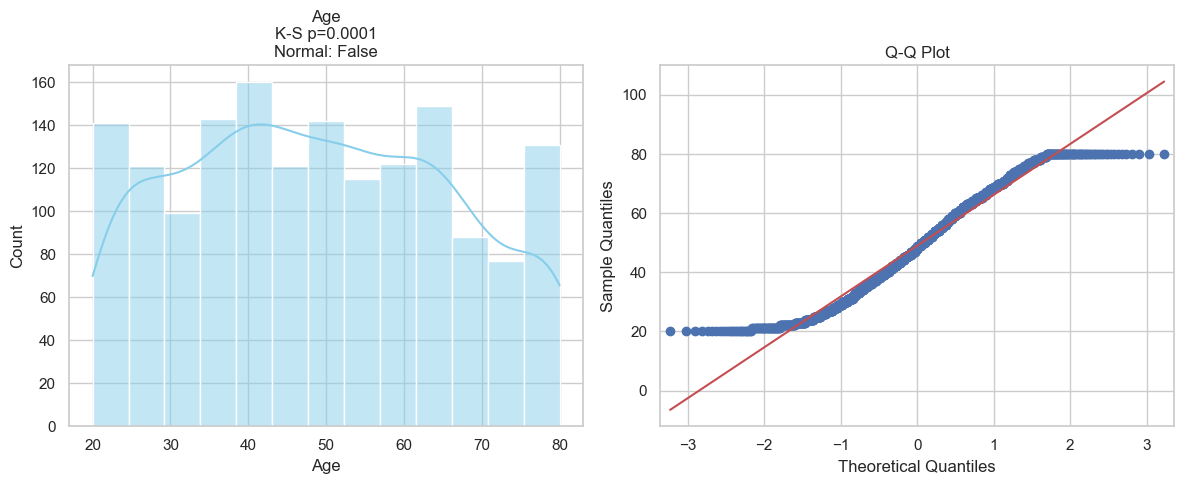


Log Transformation:


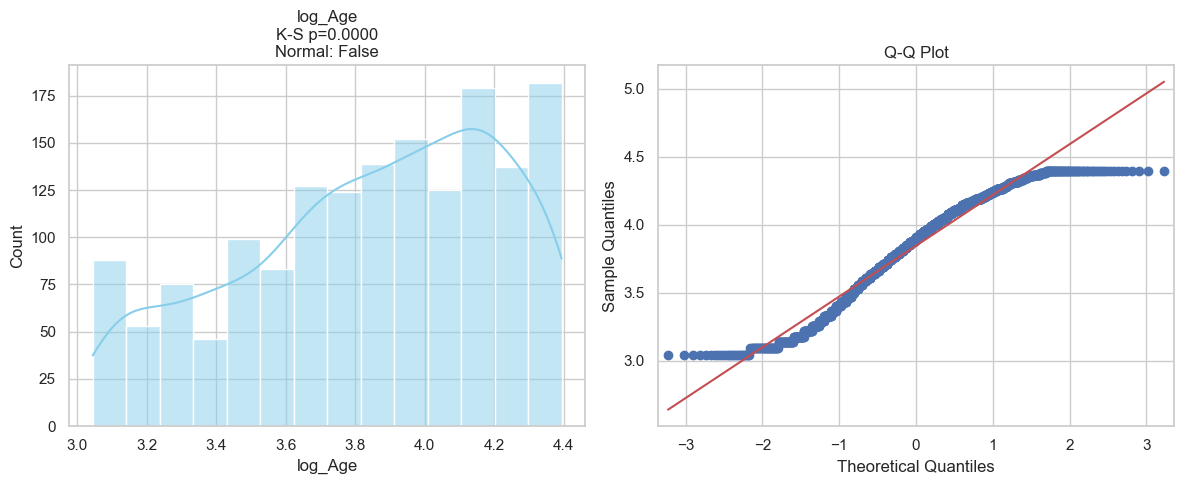


Sqrt Transformation:


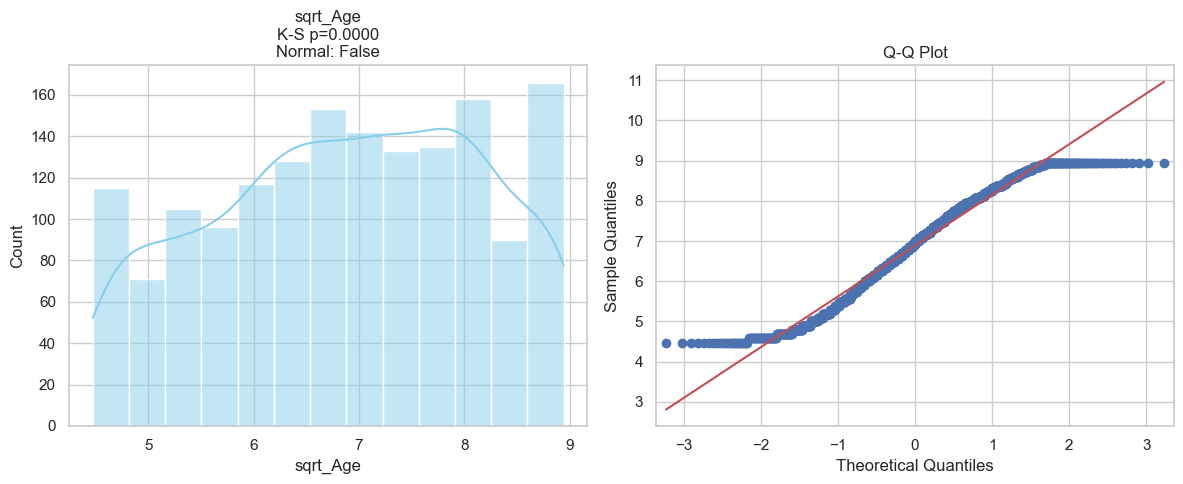


BoxCox Transformation:


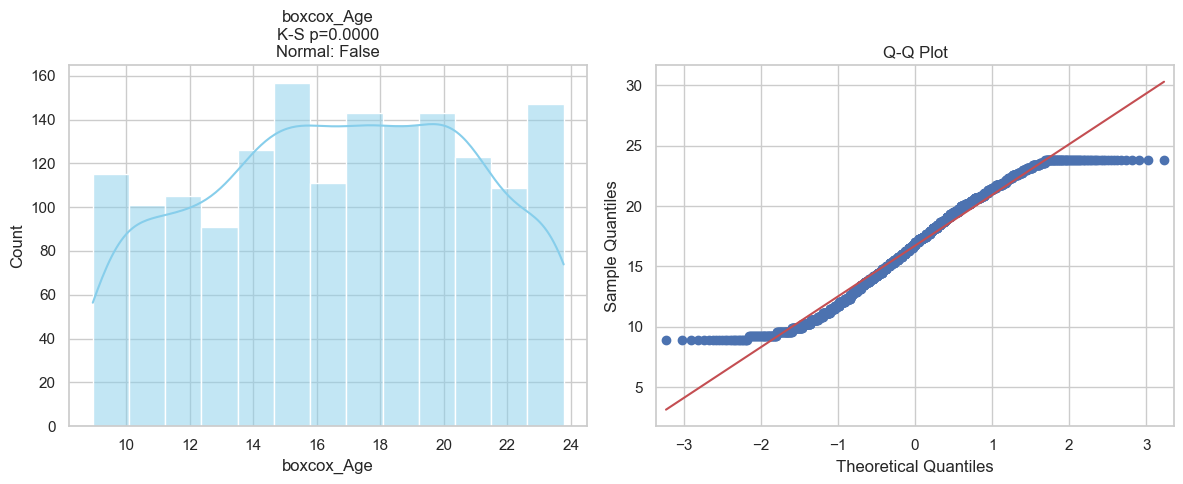


Quantile Transformation:


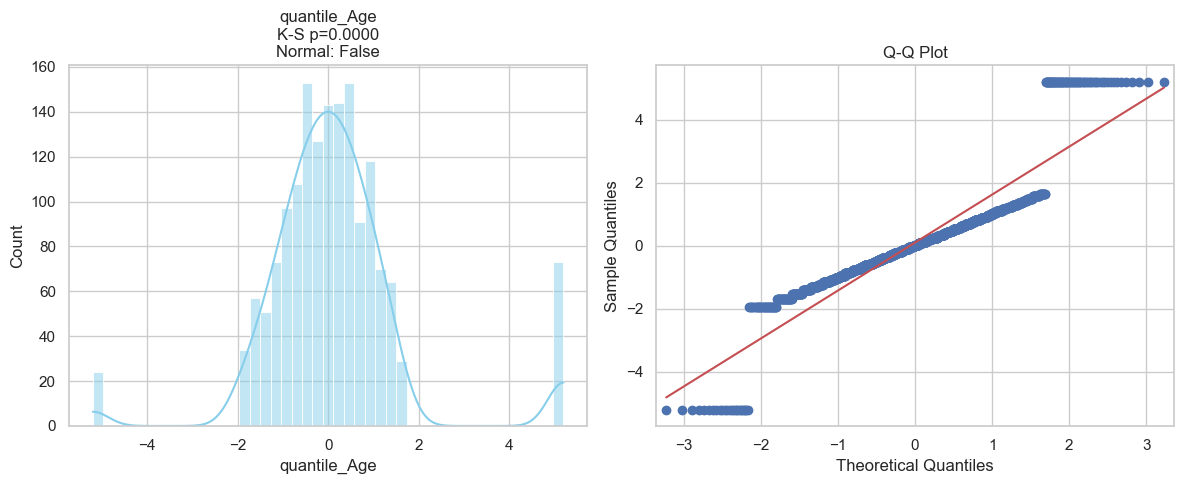


Normality Assessment for: Income

Original Transformation:


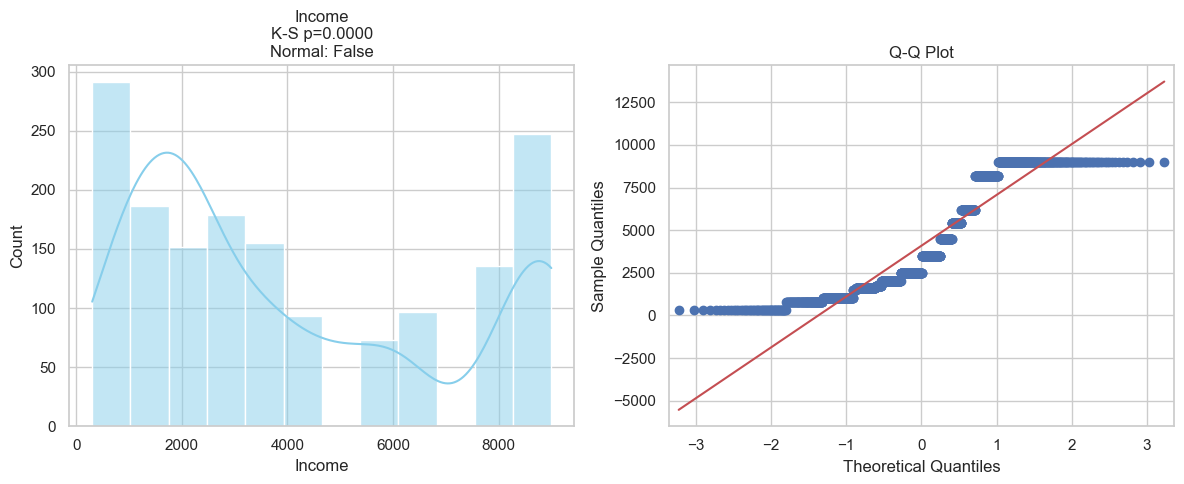


Log Transformation:


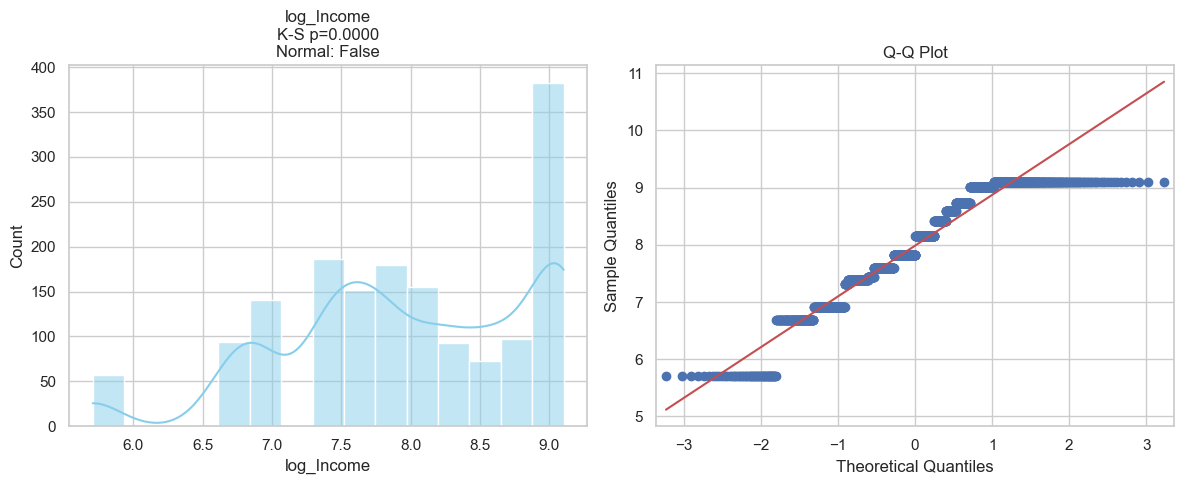


Sqrt Transformation:


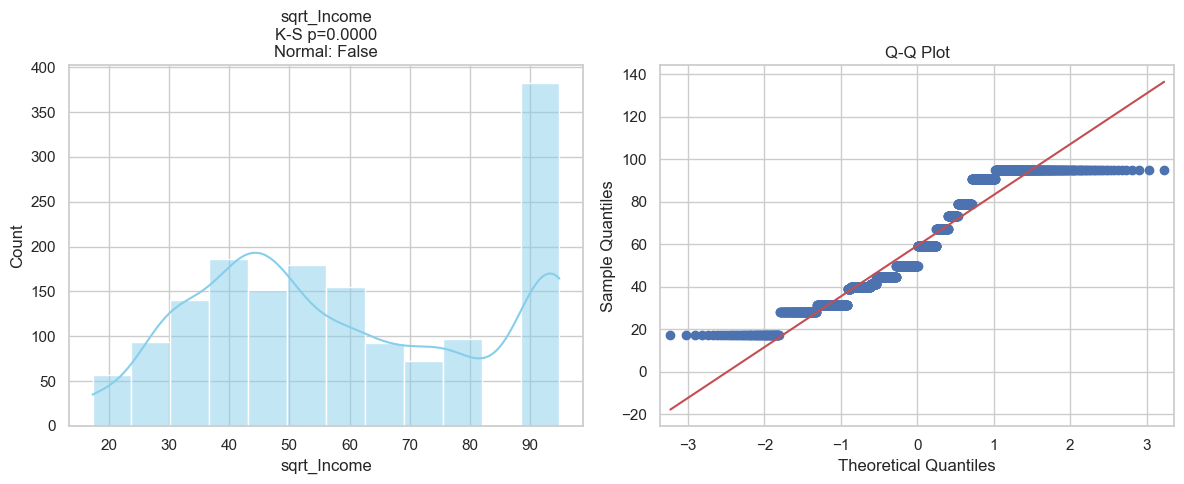


BoxCox Transformation:


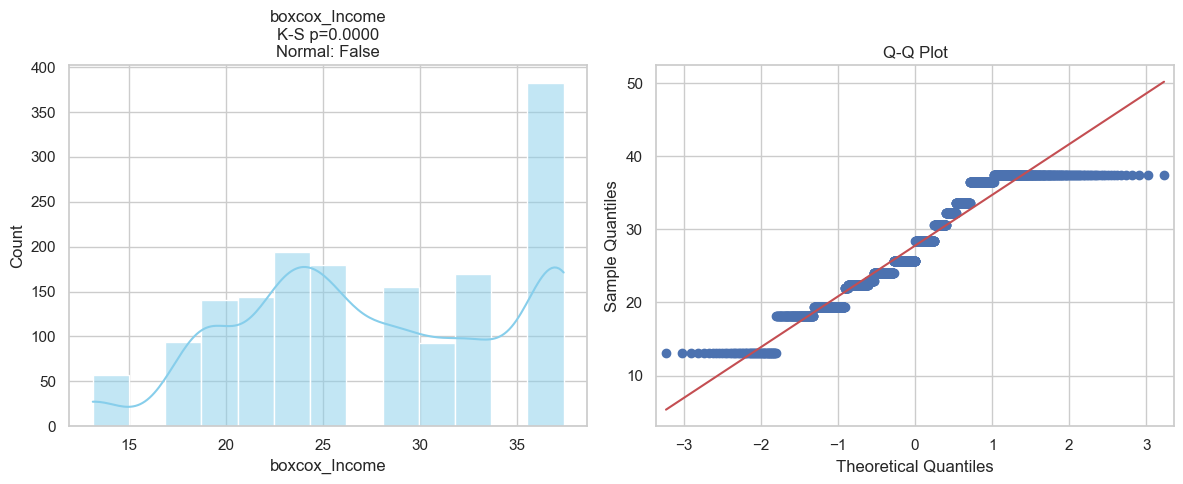


Quantile Transformation:


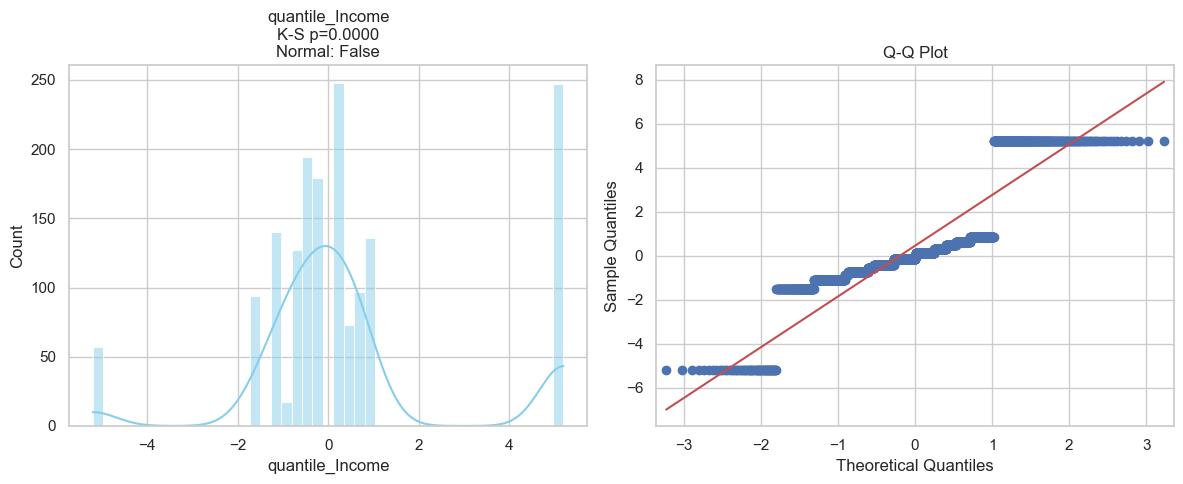


Normality Assessment for: WaistCirc

Original Transformation:


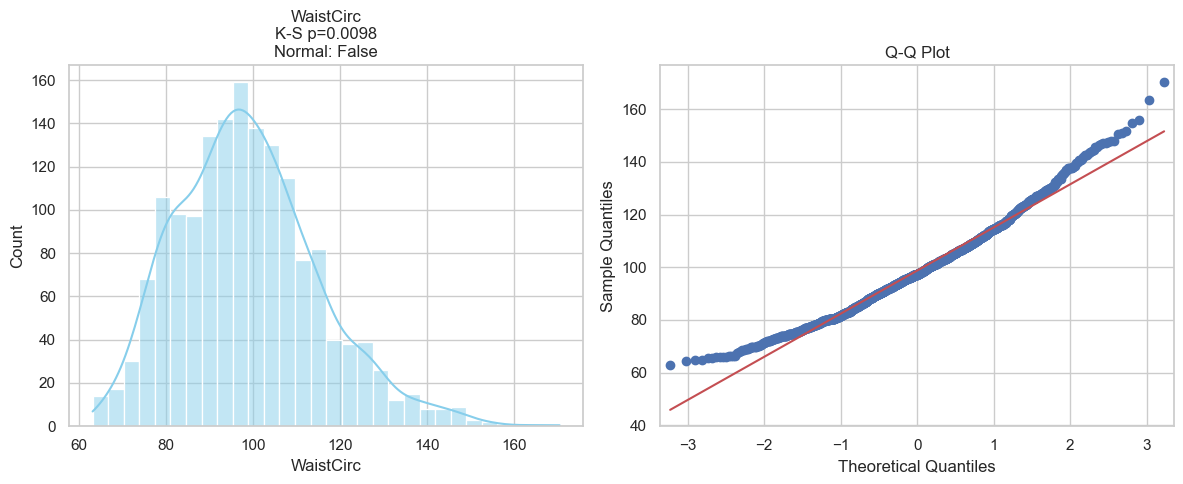


Log Transformation:


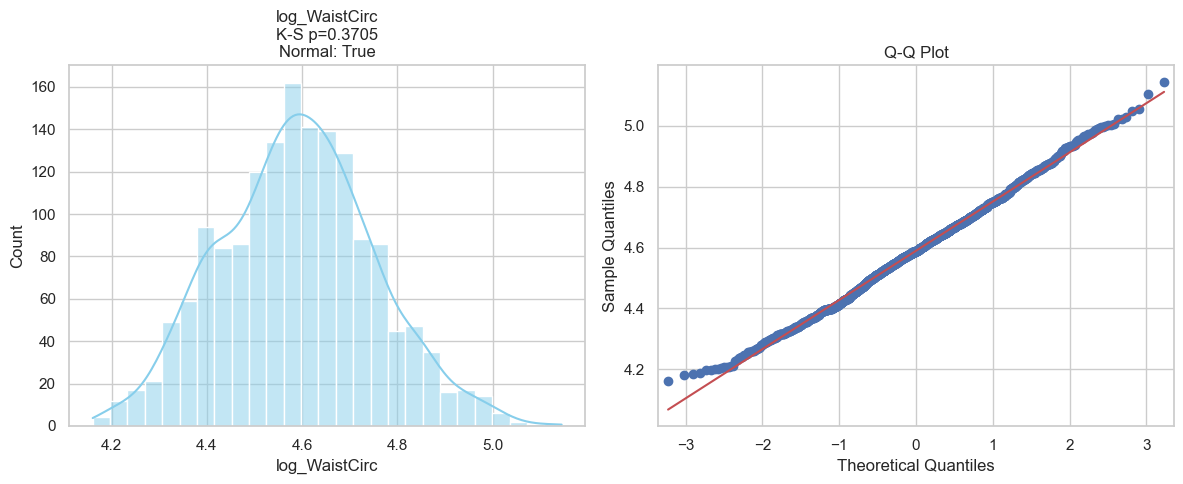


Sqrt Transformation:


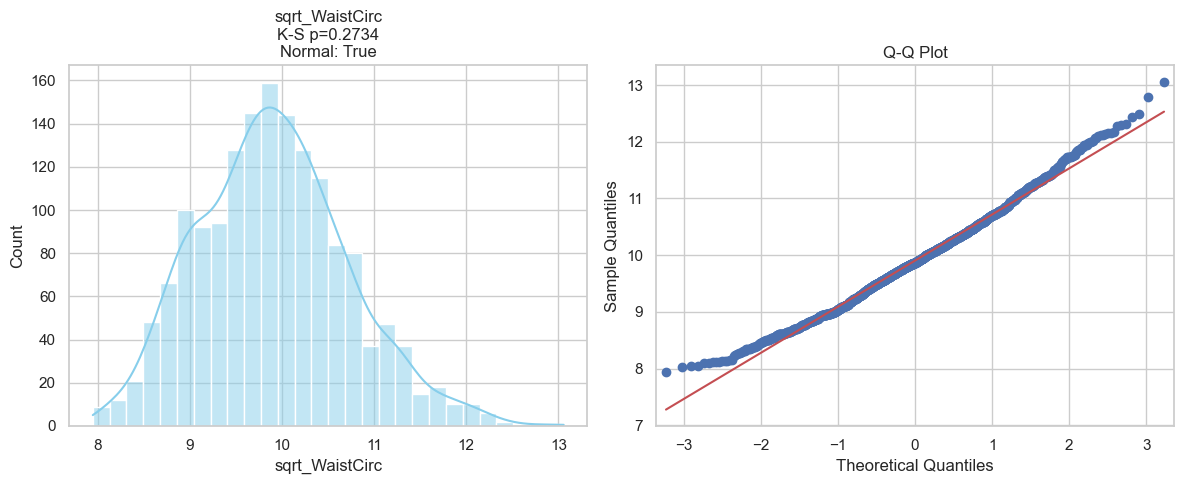


BoxCox Transformation:


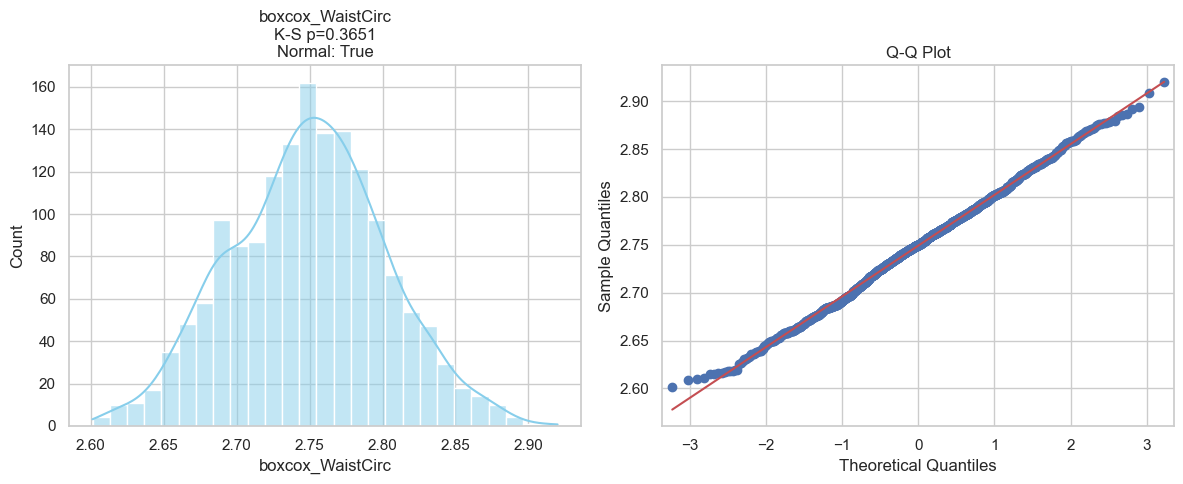


Quantile Transformation:


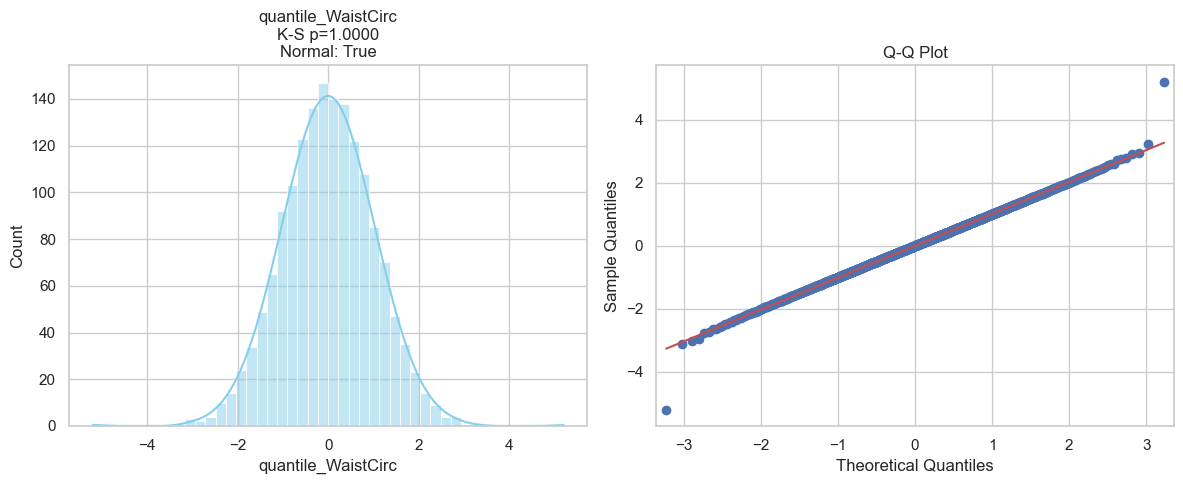


Normality Assessment for: BMI

Original Transformation:


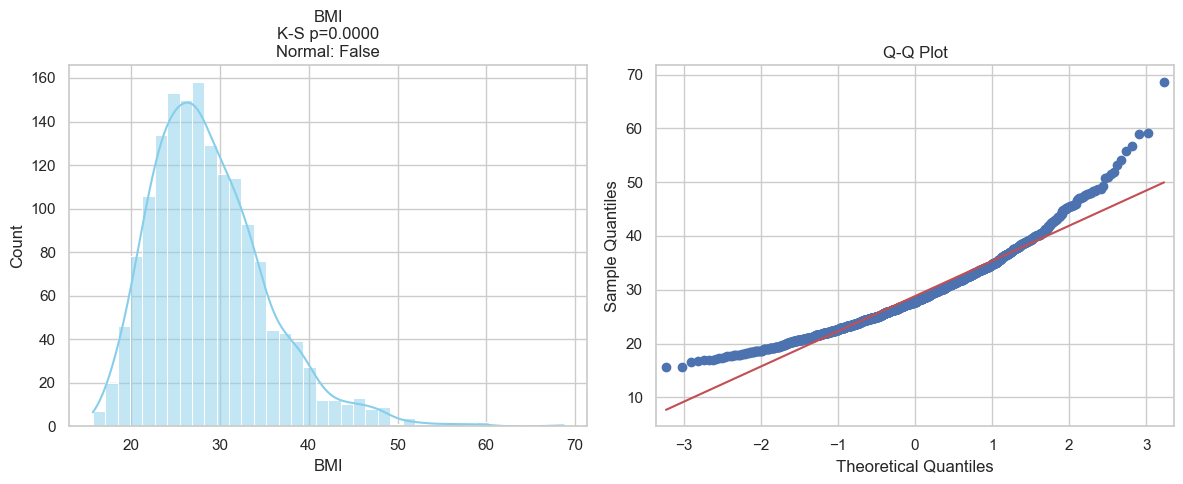


Log Transformation:


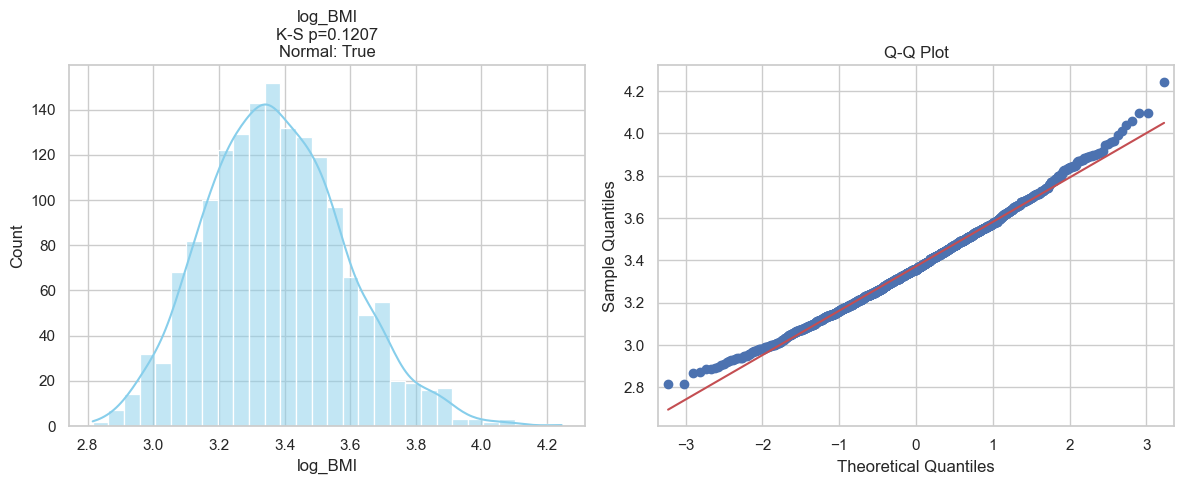


Sqrt Transformation:


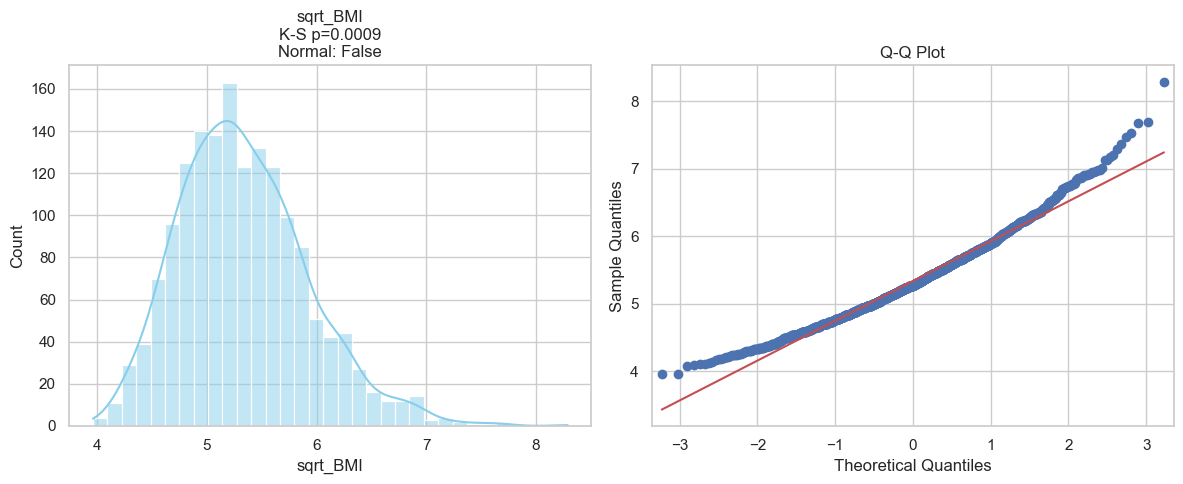


BoxCox Transformation:


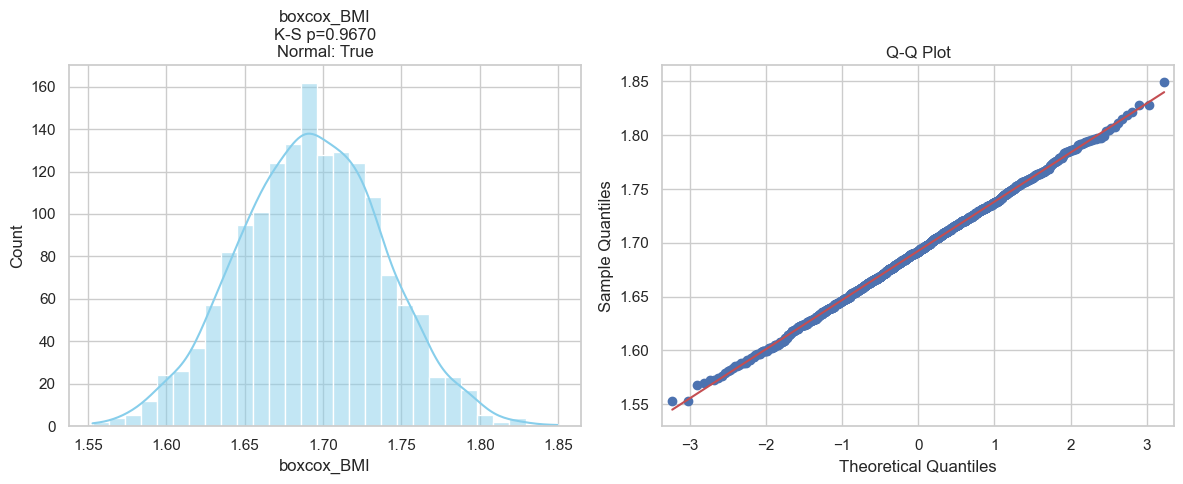


Quantile Transformation:


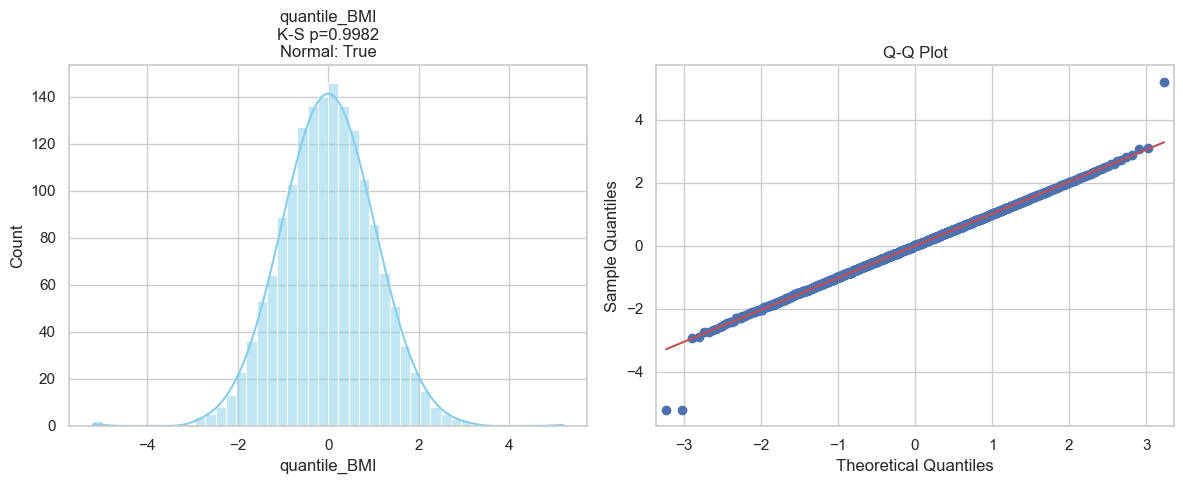


Normality Assessment for: UrAlbCr

Original Transformation:


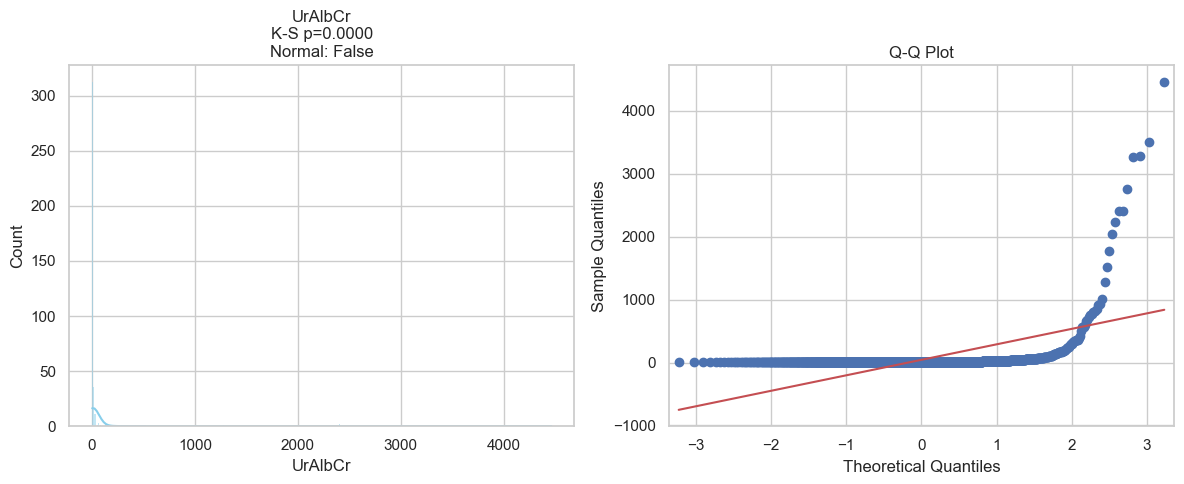


Log Transformation:


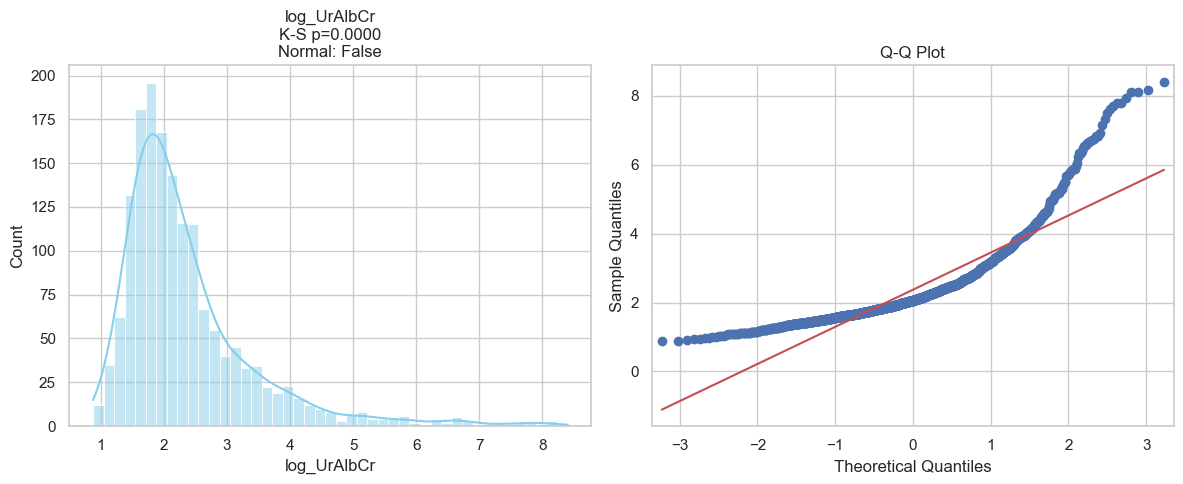


Sqrt Transformation:


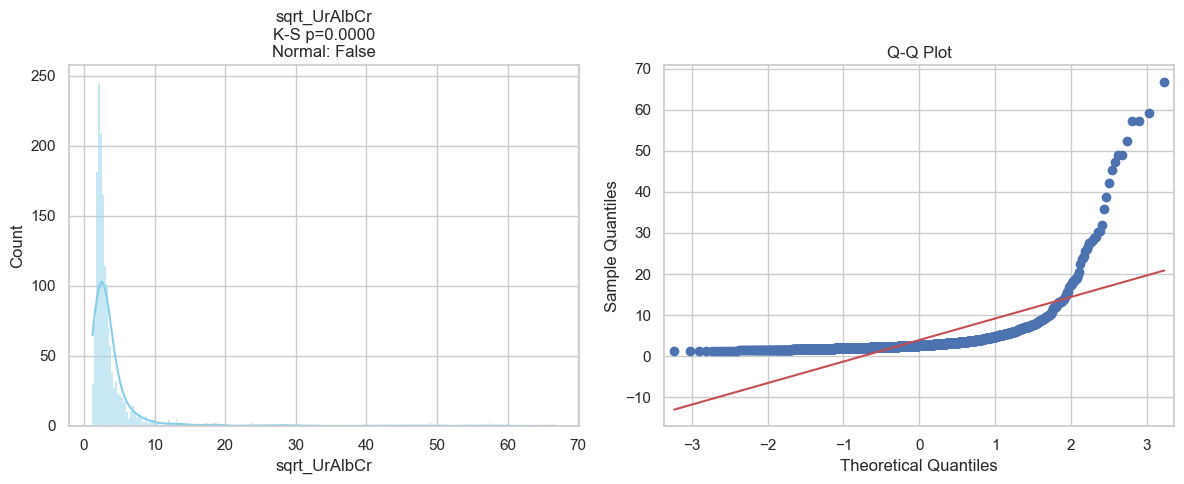


BoxCox Transformation:


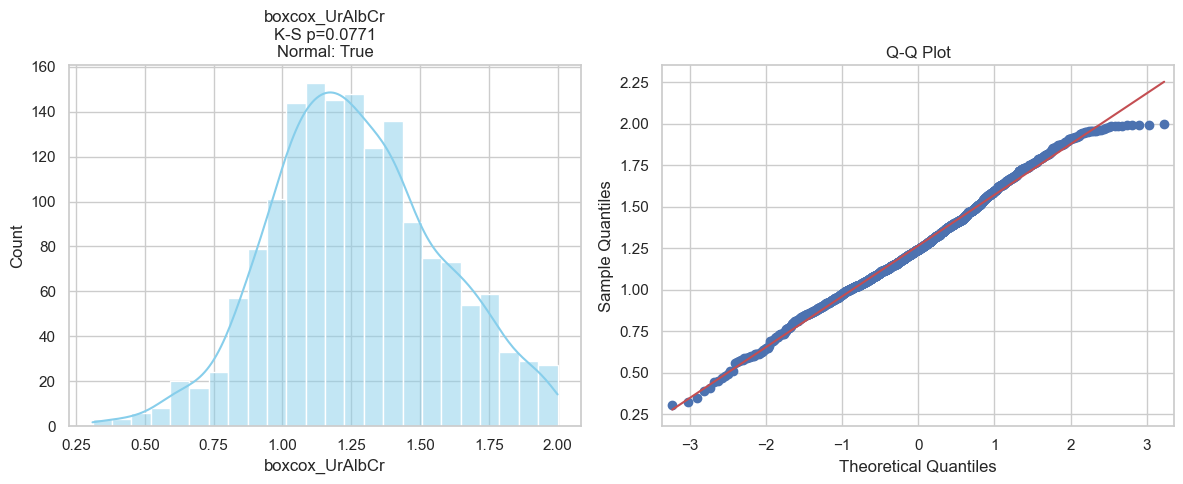


Quantile Transformation:


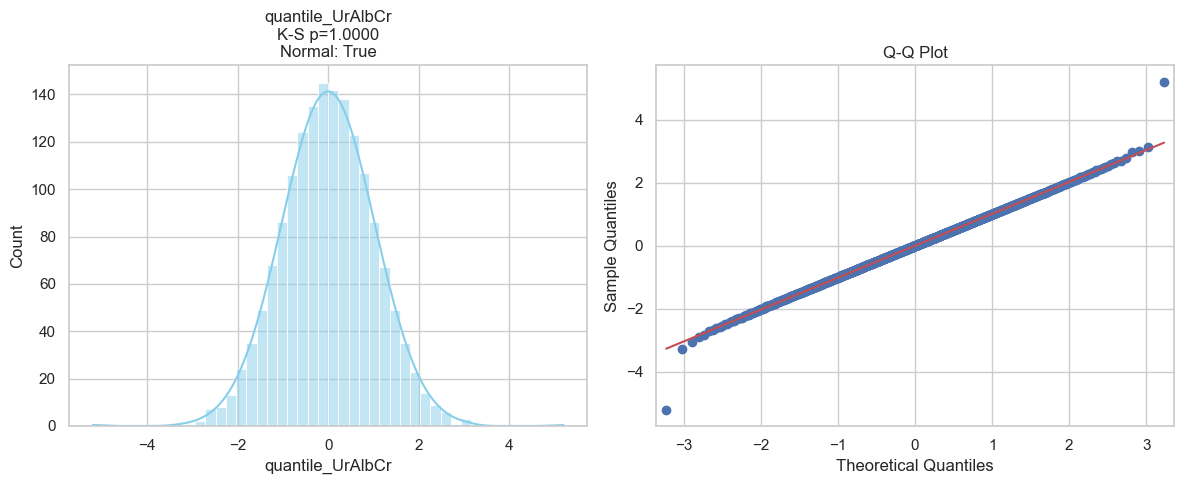


Normality Assessment for: UricAcid

Original Transformation:


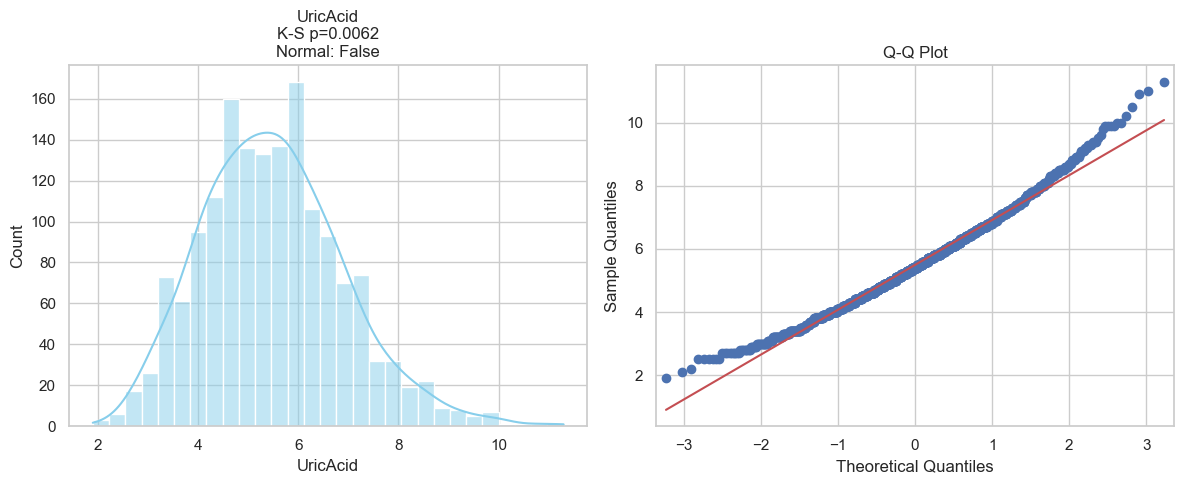


Log Transformation:


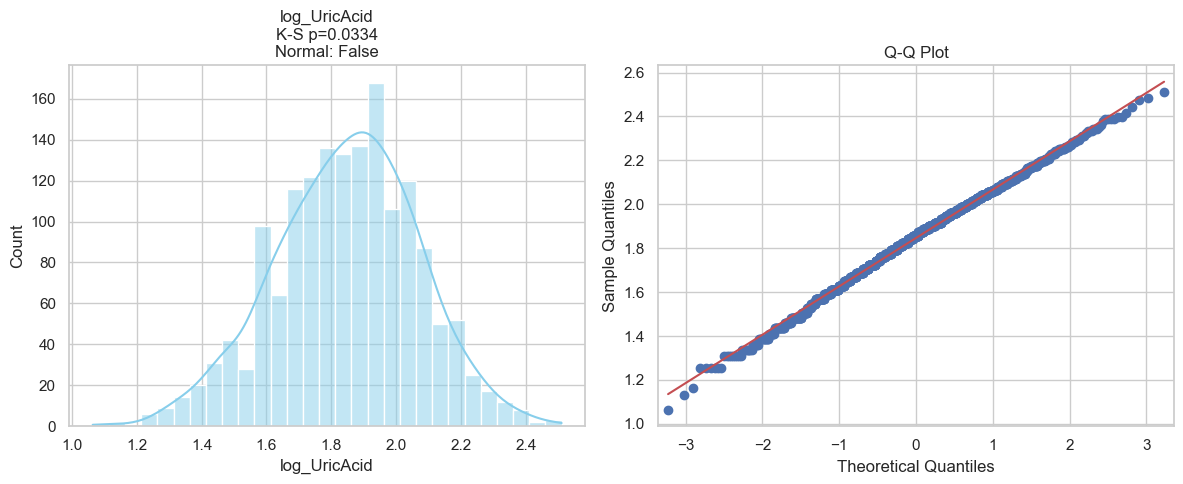


Sqrt Transformation:


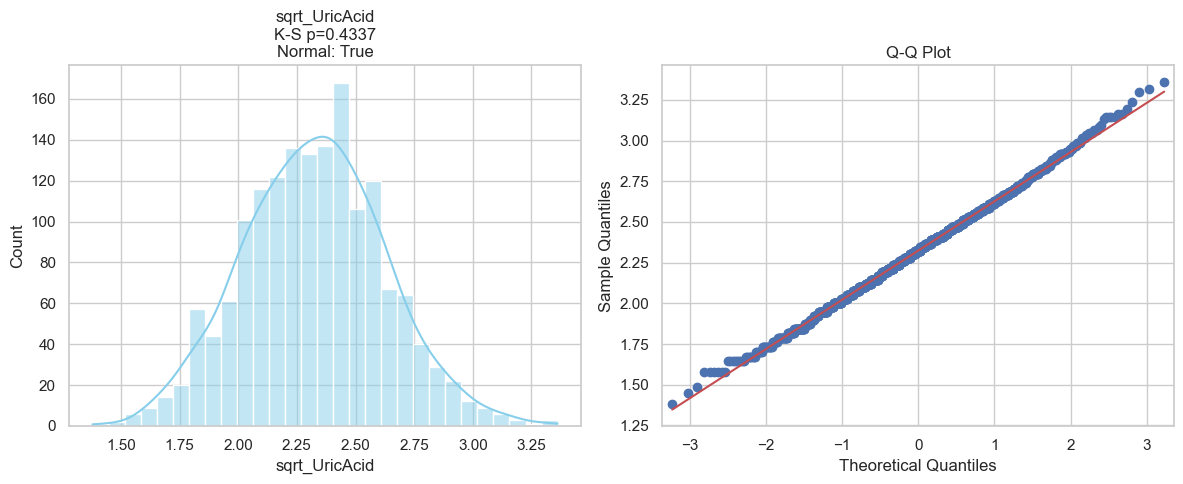


BoxCox Transformation:


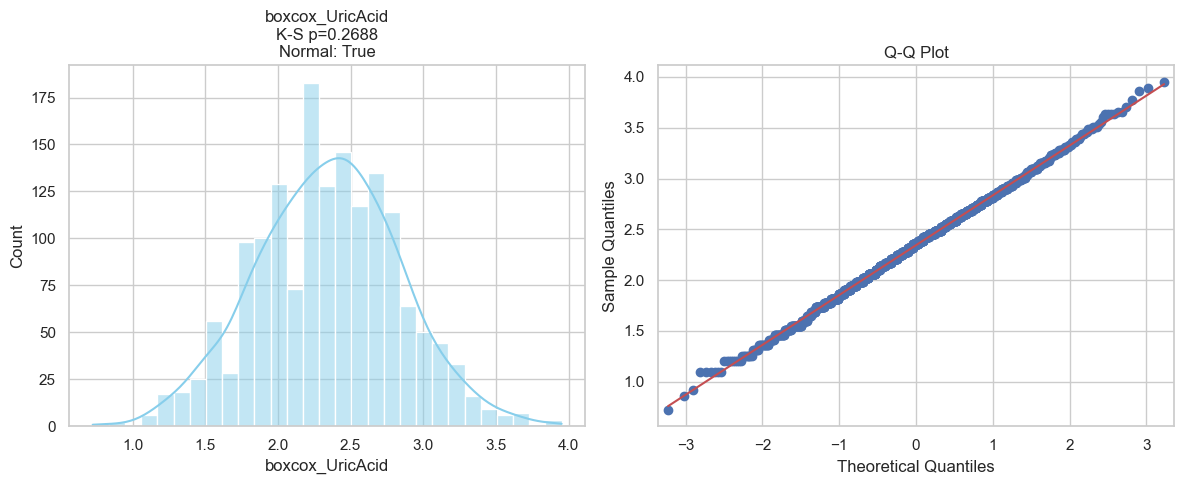


Quantile Transformation:


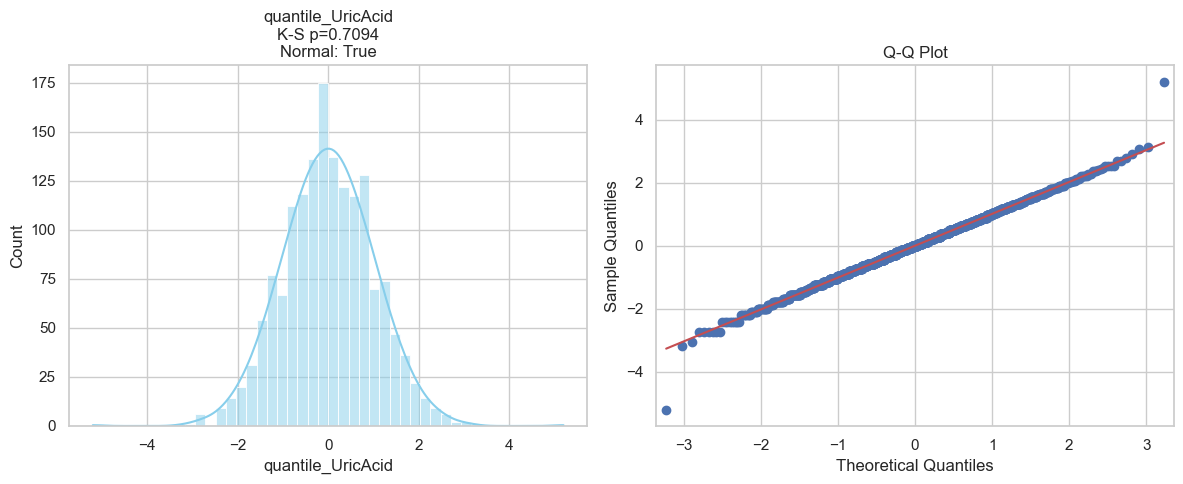


Normality Assessment for: BloodGlucose

Original Transformation:


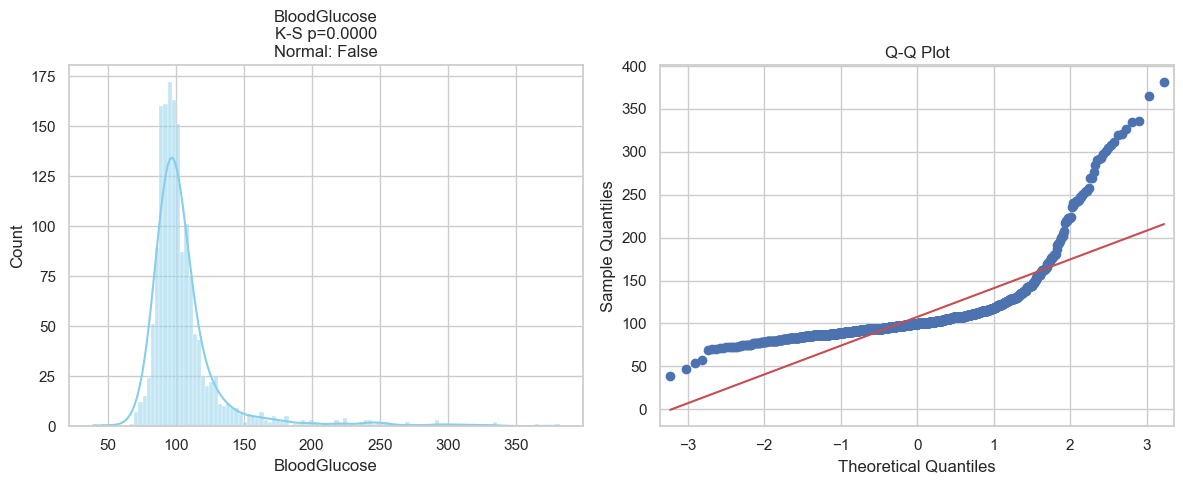


Log Transformation:


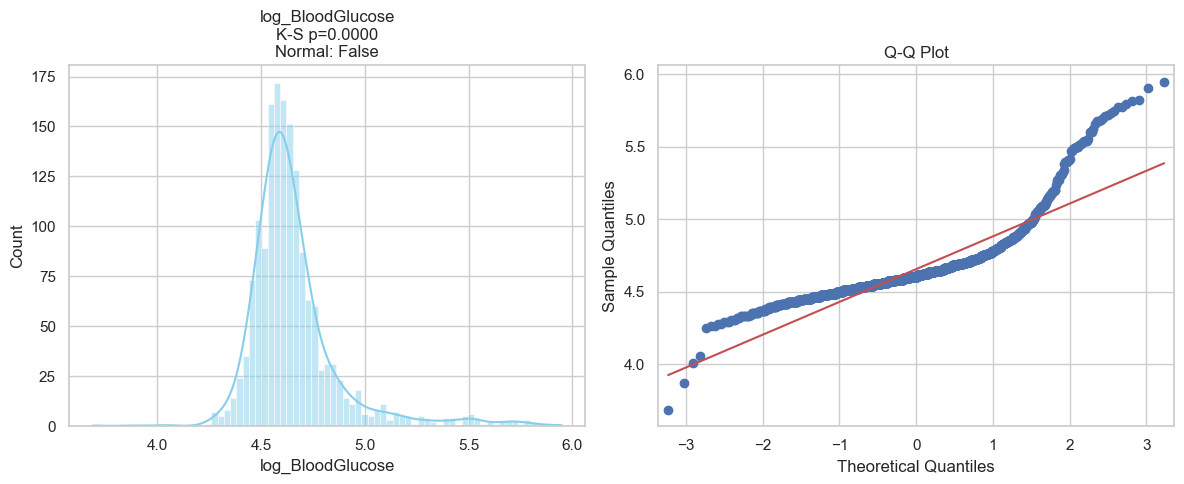


Sqrt Transformation:


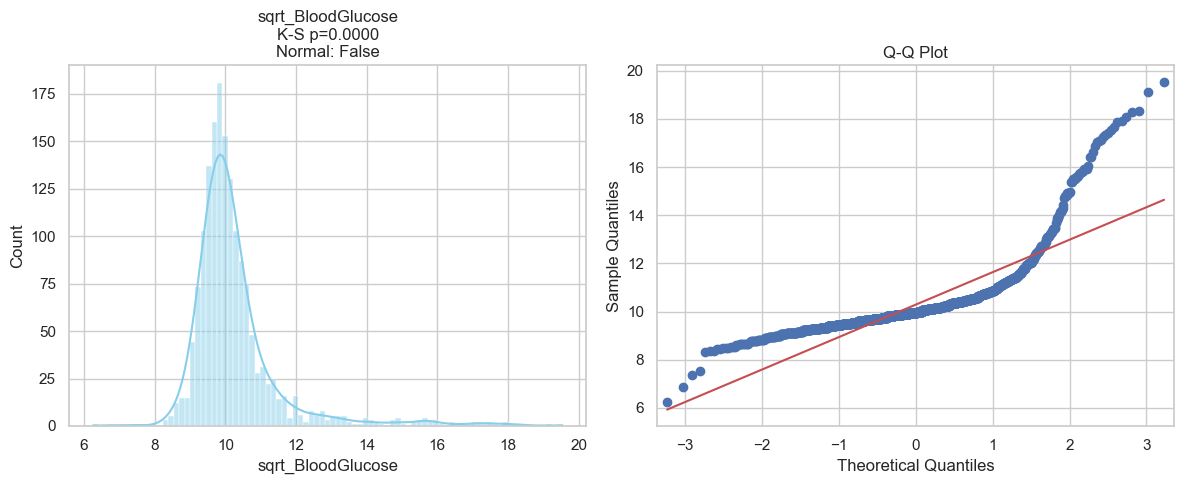


BoxCox Transformation:


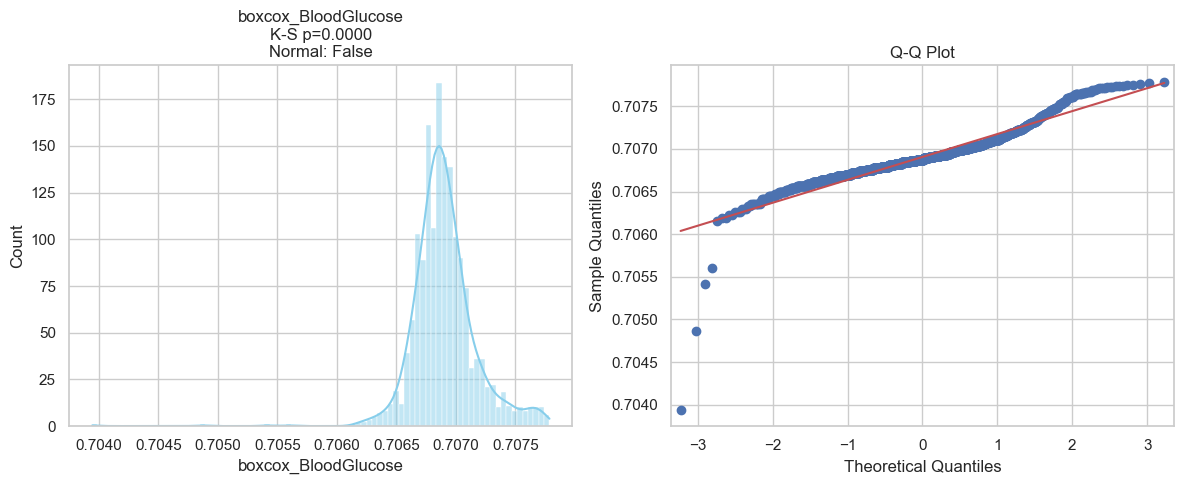


Quantile Transformation:


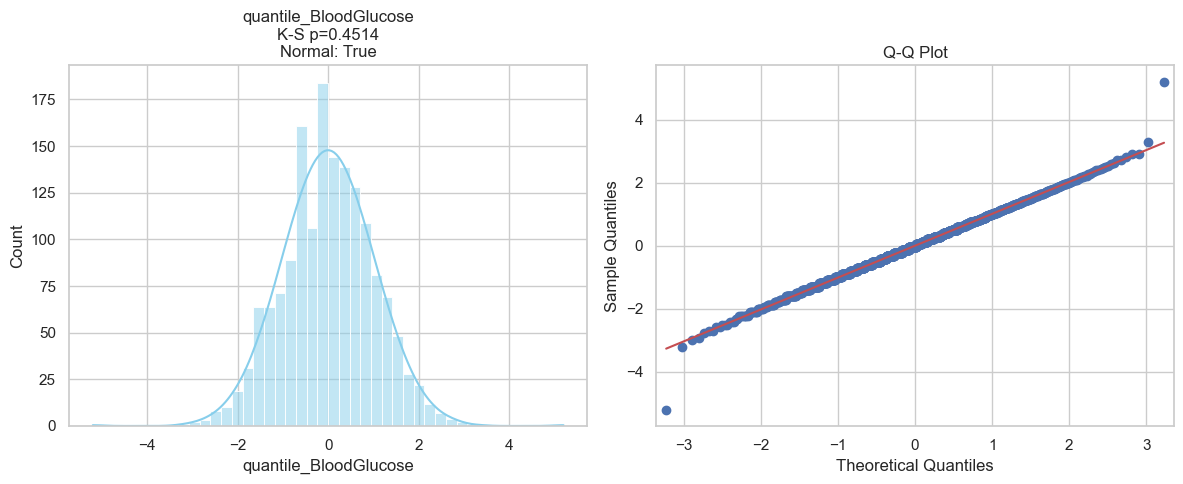


Normality Assessment for: HDL

Original Transformation:


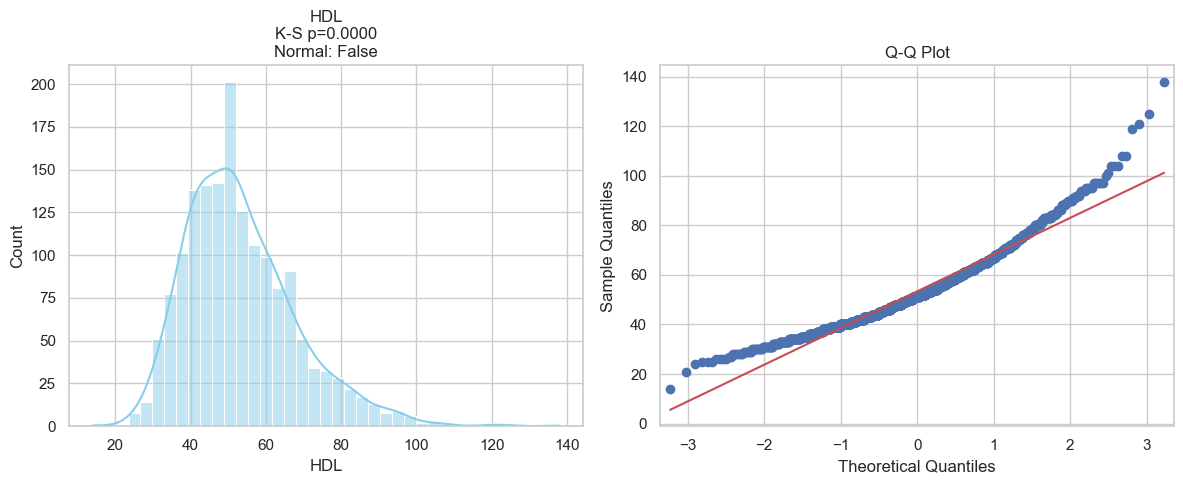


Log Transformation:


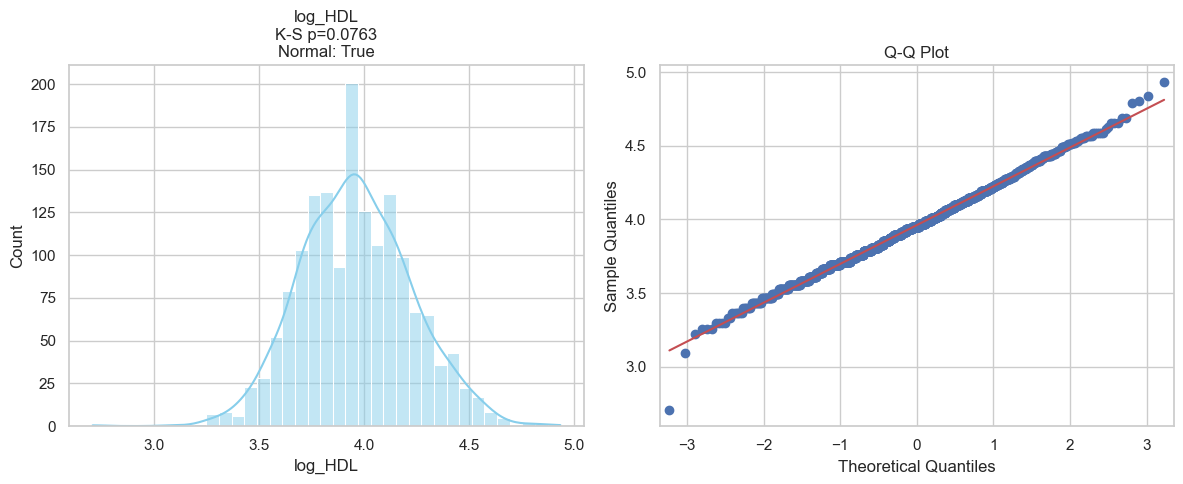


Sqrt Transformation:


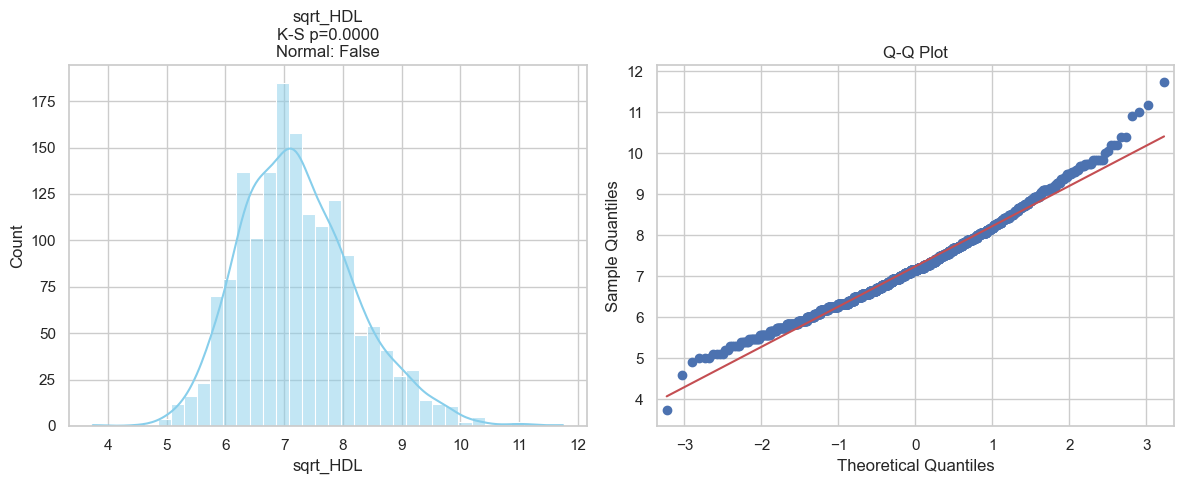


BoxCox Transformation:


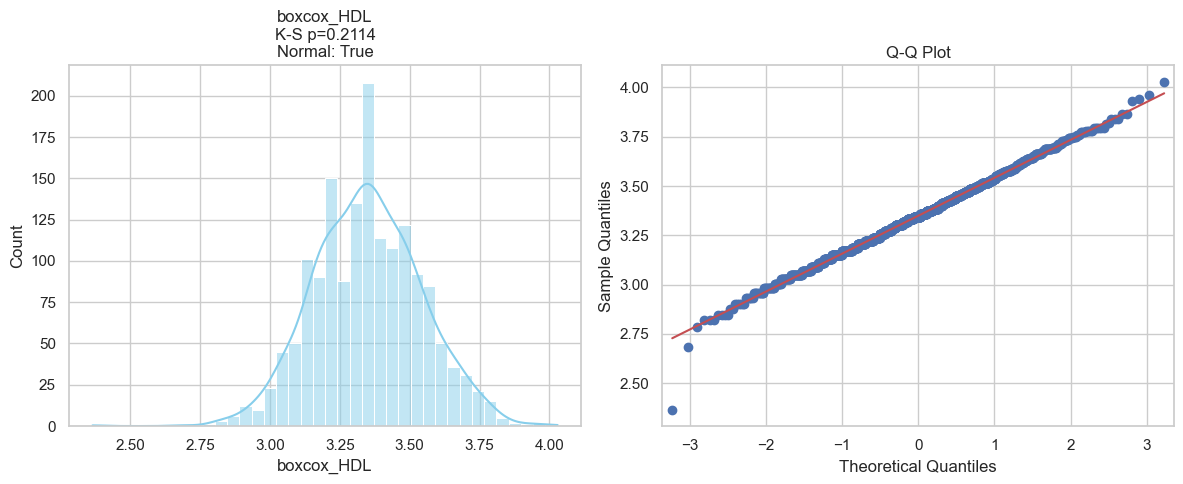


Quantile Transformation:


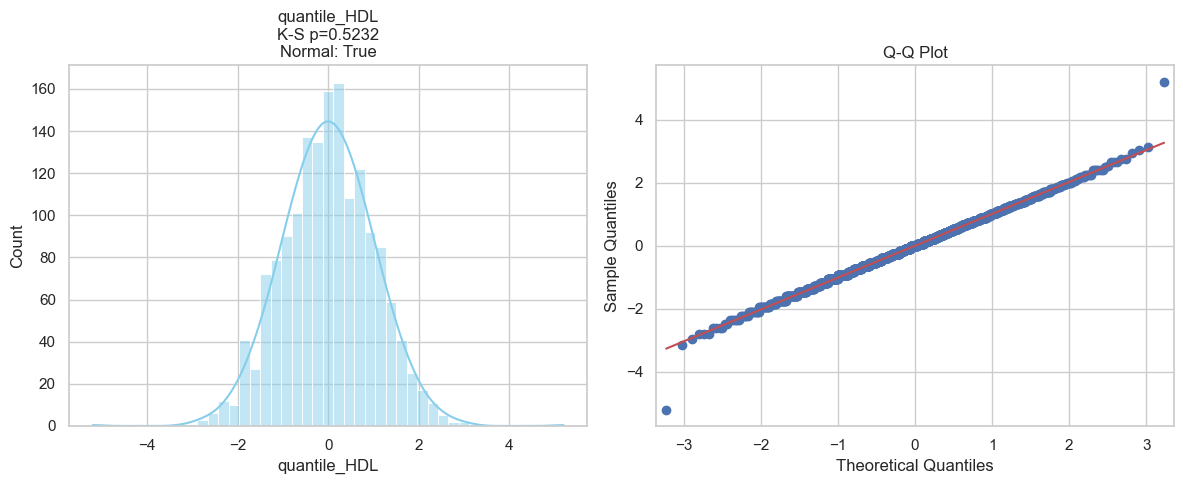


Normality Assessment for: Triglycerides

Original Transformation:


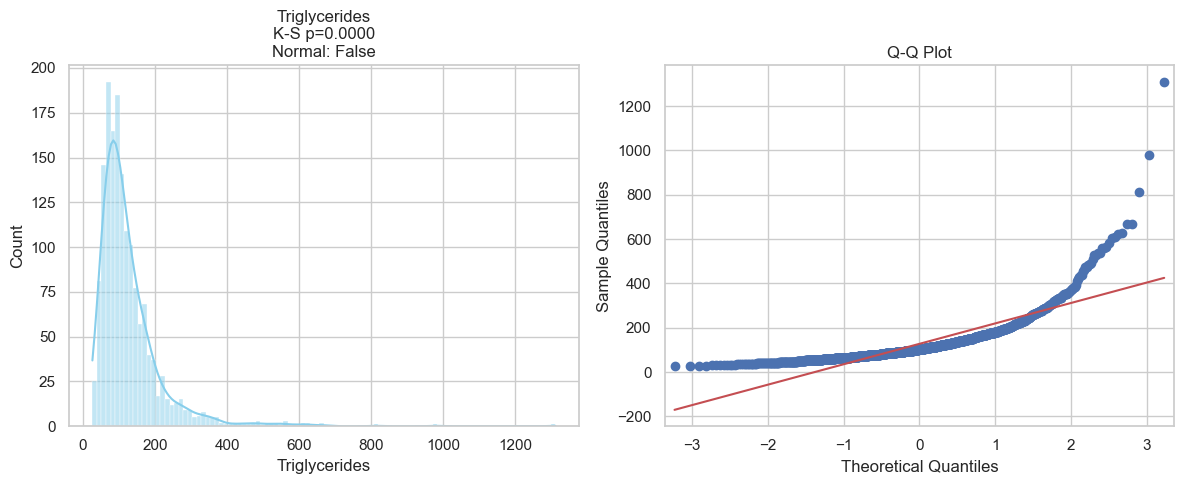


Log Transformation:


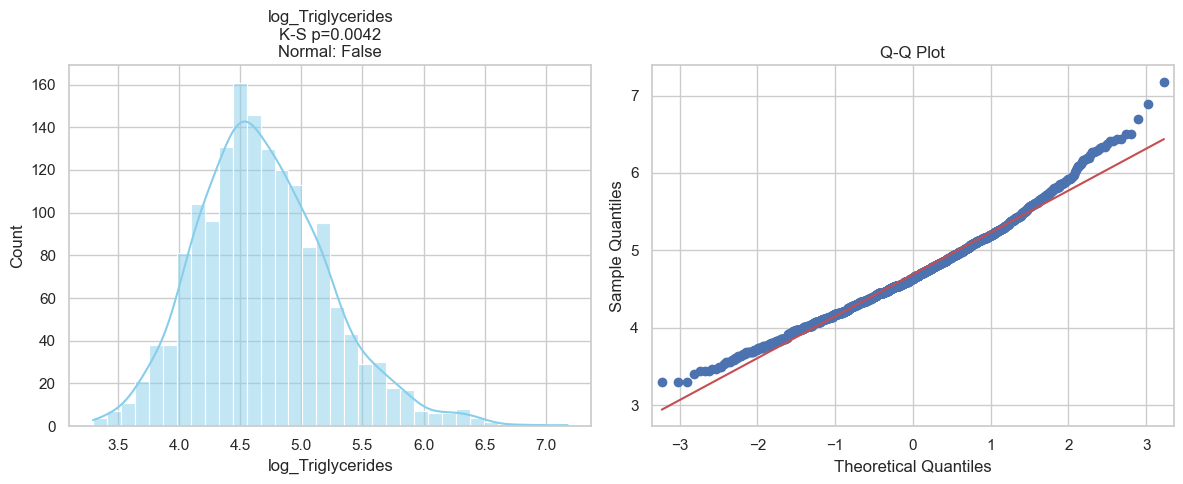


Sqrt Transformation:


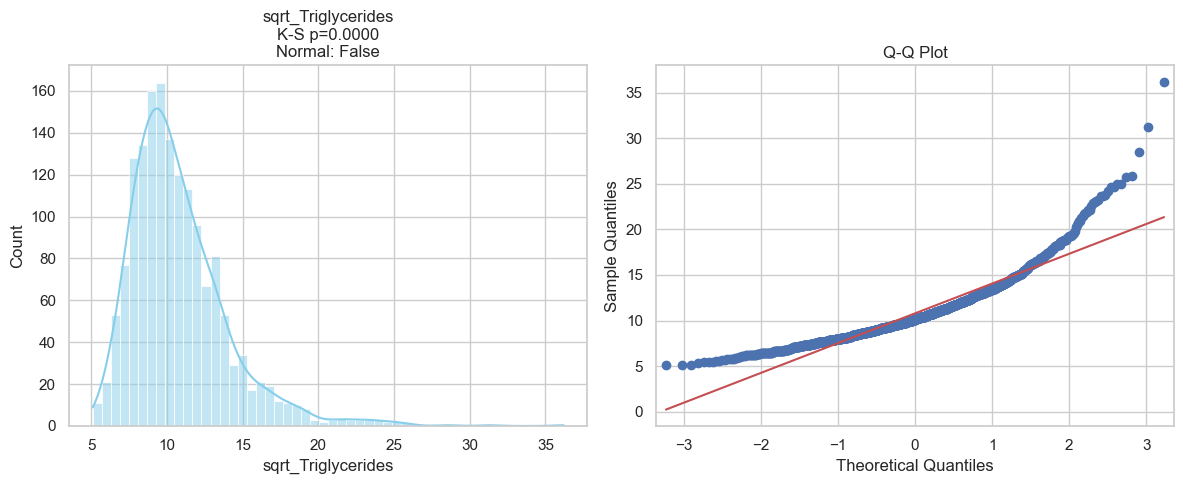


BoxCox Transformation:


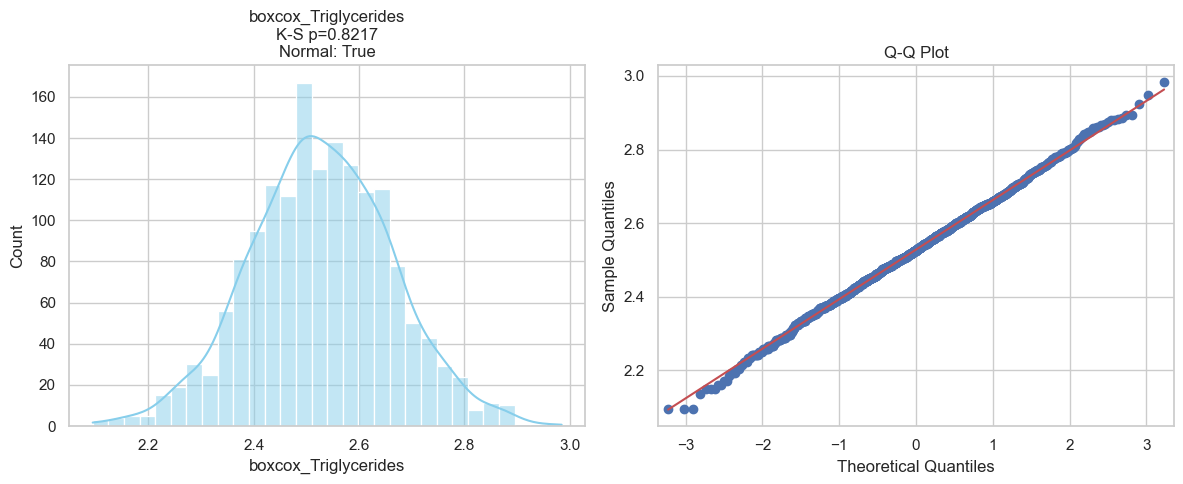


Quantile Transformation:


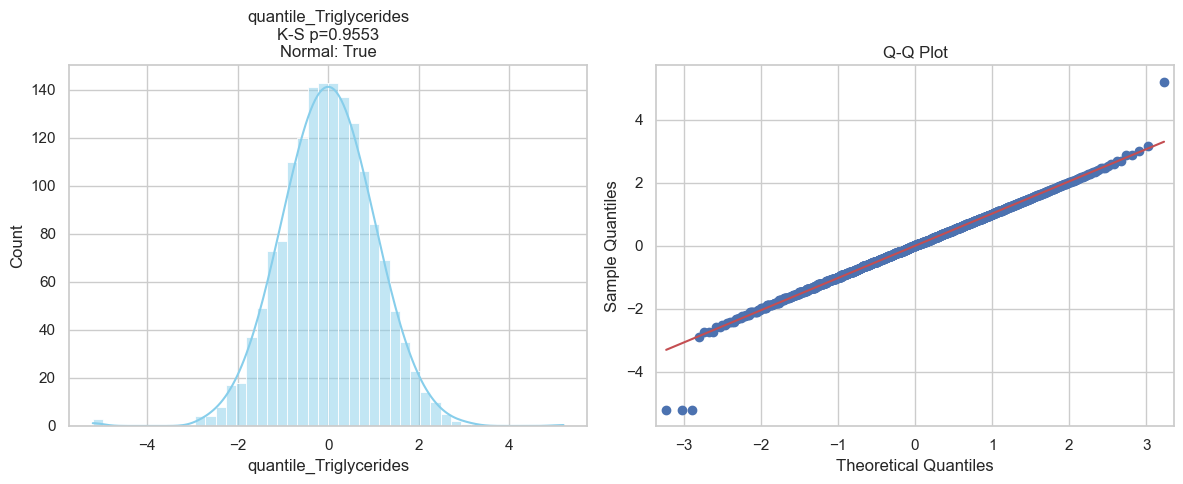


Normality Test Summary (Kolmogorov-Smirnov):
| Variable               |    KS-stat |      p-value | Normal   |
|:-----------------------|-----------:|-------------:|:---------|
| Age                    | 0.0542664  | 0.00014709   | False    |
| log_Age                | 0.0769864  | 9.67604e-09  | False    |
| sqrt_Age               | 0.0620394  | 7.94563e-06  | False    |
| boxcox_Age             | 0.0589296  | 2.67652e-05  | False    |
| quantile_Age           | 0.12841    | 1.37122e-23  | False    |
| Income                 | 0.205006   | 8.95092e-60  | False    |
| log_Income             | 0.114523   | 7.70664e-19  | False    |
| sqrt_Income            | 0.15409    | 7.94907e-34  | False    |
| boxcox_Income          | 0.132024   | 6.46617e-25  | False    |
| quantile_Income        | 0.277559   | 4.40523e-110 | False    |
| WaistCirc              | 0.0405308  | 0.00983862   | False    |
| log_WaistCirc          | 0.0227435  | 0.370453     | True     |
| sqrt_WaistCirc         | 0.0

In [91]:
# 16. Check which transformation is good
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

# Select numerical columns
num_cols = train_set_clean.select_dtypes(include=['int64', 'float64']).columns.drop('seqn')

# Initialize transformed DataFrames and normality results
transformations = {
    'Original': train_set_clean[num_cols].copy(),
    'Log': pd.DataFrame(),
    'Sqrt': pd.DataFrame(),
    'BoxCox': pd.DataFrame(),
    'Quantile': pd.DataFrame()
}

# Apply transformations
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
normality_results = []

for col in num_cols:
    # Log Transform
    transformations['Log'][f'log_{col}'] = np.log1p(train_set_clean[col])
    
    # Square Root Transform
    transformations['Sqrt'][f'sqrt_{col}'] = np.sqrt(train_set_clean[col])
    
    # Box-Cox Transform
    if (train_set_clean[col] > 0).all():
        transformations['BoxCox'][f'boxcox_{col}'], _ = stats.boxcox(train_set_clean[col])
    else:
        shifted = train_set_clean[col] - train_set_clean[col].min() + 1
        transformations['BoxCox'][f'boxcox_{col}'], _ = stats.boxcox(shifted)
    
    # Quantile Transform
    transformations['Quantile'][f'quantile_{col}'] = quantile_transformer.fit_transform(train_set_clean[[col]]).flatten()

# Function to check normality using K-S test and plot Q-Q
def assess_normality(data, col_name):
    plt.figure(figsize=(12, 5))
    
    # Kolmogorov-Smirnov test against normal distribution
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    is_normal = ks_p > 0.05
    
    # Plot histogram and Q-Q plot
    plt.subplot(1, 2, 1)
    sns.histplot(data, kde=True, color='skyblue')
    plt.title(f'{col_name}\nK-S p={ks_p:.4f}\nNormal: {is_normal}')
    
    plt.subplot(1, 2, 2)
    qqplot(data, line='s', ax=plt.gca())
    plt.title('Q-Q Plot')
    
    plt.tight_layout()
    plt.show()
    
    return {'Variable': col_name, 'KS-stat': ks_stat, 'p-value': ks_p, 'Normal': is_normal}

# Assess normality for all transformations
for col in num_cols:
    print(f"\n{'='*50}\nNormality Assessment for: {col}\n{'='*50}")
    
    for transform_name, df in transformations.items():
        if transform_name == 'Original':
            col_name = col
        else:
            col_name = f'{transform_name.lower()}_{col}'
        
        print(f"\n{transform_name} Transformation:")
        normality_results.append(assess_normality(df[col_name].dropna(), col_name))

# Create normality summary table
normality_df = pd.DataFrame(normality_results)
print("\nNormality Test Summary (Kolmogorov-Smirnov):")
print(normality_df.to_markdown(index=False))

In [92]:
# 17. Apply quantile transformation
from sklearn.preprocessing import QuantileTransformer

# Define columns to transform and columns to keep
cols_to_transform = ['WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']
cols_to_keep = ['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'Albuminuria', 'MetabolicSyndrome']

# Initialize QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# For TRAIN set
# Extract columns to transform
train_to_transform = train_set_clean[cols_to_transform].copy()
# Extract columns to keep
train_to_keep = train_set_clean[cols_to_keep].copy()

# Apply Quantile Transformation
train_transformed = pd.DataFrame(quantile_transformer.fit_transform(train_to_transform),
                               columns=[f'QT_{col}' for col in cols_to_transform],
                               index=train_set_clean.index)

# Combine transformed and kept columns
train_set_clean_transform = pd.concat([train_to_keep, train_transformed], axis=1)

# For TEST set
# Extract columns to transform
test_to_transform = test_set_clean[cols_to_transform].copy()
# Extract columns to keep
test_to_keep = test_set_clean[cols_to_keep].copy()

# Apply same transformation (using parameters from train)
test_transformed = pd.DataFrame(quantile_transformer.transform(test_to_transform),
                              columns=[f'QT_{col}' for col in cols_to_transform],
                              index=test_set_clean.index)

# Combine transformed and kept columns
test_set_clean_transform = pd.concat([test_to_keep, test_transformed], axis=1)

# Verify results
print("Train Set Columns:", train_set_clean_transform.columns.tolist())
print("\nTrain Set Transformed Variables Sample:")
print(train_set_clean_transform[[f'QT_{col}' for col in cols_to_transform]].head())
print("\nTest Set Transformed Variables Sample:")
print(test_set_clean_transform[[f'QT_{col}' for col in cols_to_transform]].head())

Train Set Columns: ['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'Albuminuria', 'MetabolicSyndrome', 'QT_WaistCirc', 'QT_BMI', 'QT_UrAlbCr', 'QT_UricAcid', 'QT_BloodGlucose', 'QT_HDL', 'QT_Triglycerides']

Train Set Transformed Variables Sample:
      QT_WaistCirc    QT_BMI  QT_UrAlbCr  QT_UricAcid  QT_BloodGlucose  \
852       1.529558  1.374878    0.149053    -0.287442         2.096521   
700       0.000000  0.235509   -0.969427    -0.143512        -0.125788   
1641      0.042668  0.021329   -0.454249    -0.074087        -0.705530   
1763      0.945616  1.184447    0.926123    -0.895780        -0.222630   
1139      0.605035  0.443149    0.426290     2.475187        -0.222630   

        QT_HDL  QT_Triglycerides  
852  -0.551076          1.212751  
700  -0.099274          0.021329  
1641  1.629992         -0.656486  
1763 -0.551076         -0.295296  
1139 -0.935852          1.252988  

Test Set Transformed Variables Sample:
      QT_WaistCirc    QT_BMI  QT_UrAlbCr  QT_UricAcid

In [93]:
# 18. Check data types of original dataset and transformed dataset
print("Data types(train_set_clean):")
print(train_set_clean.dtypes)
print("Data types(train_set_clean_transform):")
print(train_set_clean_transform.dtypes)

Data types(train_set_clean):
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
WaistCirc             float64
BMI                   float64
Albuminuria          category
UrAlbCr               float64
UricAcid              float64
BloodGlucose            int64
HDL                     int64
Triglycerides           int64
MetabolicSyndrome    category
dtype: object
Data types(train_set_clean_transform):
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
dtype: object


In [94]:
# 19. Apply quantile transformation on missing value dataset 
from sklearn.preprocessing import QuantileTransformer

# Define columns to transform and columns to keep
cols_to_transform = ['WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL', 'Triglycerides']
cols_to_keep = ['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'Albuminuria', 'MetabolicSyndrome']

# Initialize QuantileTransformer
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)

# For TRAIN set
# Extract columns to transform
train_to_transform = train_set[cols_to_transform].copy()
# Extract columns to keep
train_to_keep = train_set[cols_to_keep].copy()

# Apply Quantile Transformation
train_transformed = pd.DataFrame(quantile_transformer.fit_transform(train_to_transform),
                               columns=[f'QT_{col}' for col in cols_to_transform],
                               index=train_set.index)

# Combine transformed and kept columns
train_set_transform= pd.concat([train_to_keep, train_transformed], axis=1)

# For TEST set
# Extract columns to transform
test_to_transform = test_set[cols_to_transform].copy()
# Extract columns to keep
test_to_keep = test_set[cols_to_keep].copy()

# Apply same transformation (using parameters from train)
test_transformed = pd.DataFrame(quantile_transformer.transform(test_to_transform),
                              columns=[f'QT_{col}' for col in cols_to_transform],
                              index=test_set.index)

# Combine transformed and kept columns
test_set_transform = pd.concat([test_to_keep, test_transformed], axis=1)

# Verify results
print("Train Set Columns:", train_set_transform.columns.tolist())
print("\nTrain Set Transformed Variables Sample:")
print(train_set_transform[[f'QT_{col}' for col in cols_to_transform]].head())
print("\nTest Set Transformed Variables Sample:")
print(test_set_transform[[f'QT_{col}' for col in cols_to_transform]].head())

Train Set Columns: ['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'Albuminuria', 'MetabolicSyndrome', 'QT_WaistCirc', 'QT_BMI', 'QT_UrAlbCr', 'QT_UricAcid', 'QT_BloodGlucose', 'QT_HDL', 'QT_Triglycerides']

Train Set Transformed Variables Sample:
      QT_WaistCirc    QT_BMI  QT_UrAlbCr  QT_UricAcid  QT_BloodGlucose  \
852       1.533612  1.374878    0.131738    -0.286135         2.096521   
700       0.007527  0.253606   -0.951591    -0.144780        -0.109365   
1641      0.047692  0.022584   -0.468203    -0.071571        -0.684763   
1763      0.961429  1.184447    0.904853    -0.882739        -0.204660   
996            NaN -2.837803    1.650067    -0.430727         0.749670   

        QT_HDL  QT_Triglycerides  
852  -0.542335          1.207532  
700  -0.091712          0.023839  
1641  1.611333         -0.650274  
1763 -0.542335         -0.290058  
996   0.292676          1.149742  

Test Set Transformed Variables Sample:
      QT_WaistCirc    QT_BMI  QT_UrAlbCr  QT_UricAcid

In [95]:
#20. check data types
print("Data types(train_set):")
print(train_set.dtypes)
print("Data types(train_set_transform):")
print(train_set_transform.dtypes)

Data types(train_set):
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
WaistCirc             float64
BMI                   float64
Albuminuria          category
UrAlbCr               float64
UricAcid              float64
BloodGlucose            int64
HDL                     int64
Triglycerides           int64
MetabolicSyndrome    category
dtype: object
Data types(train_set_transform):
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
dtype: object


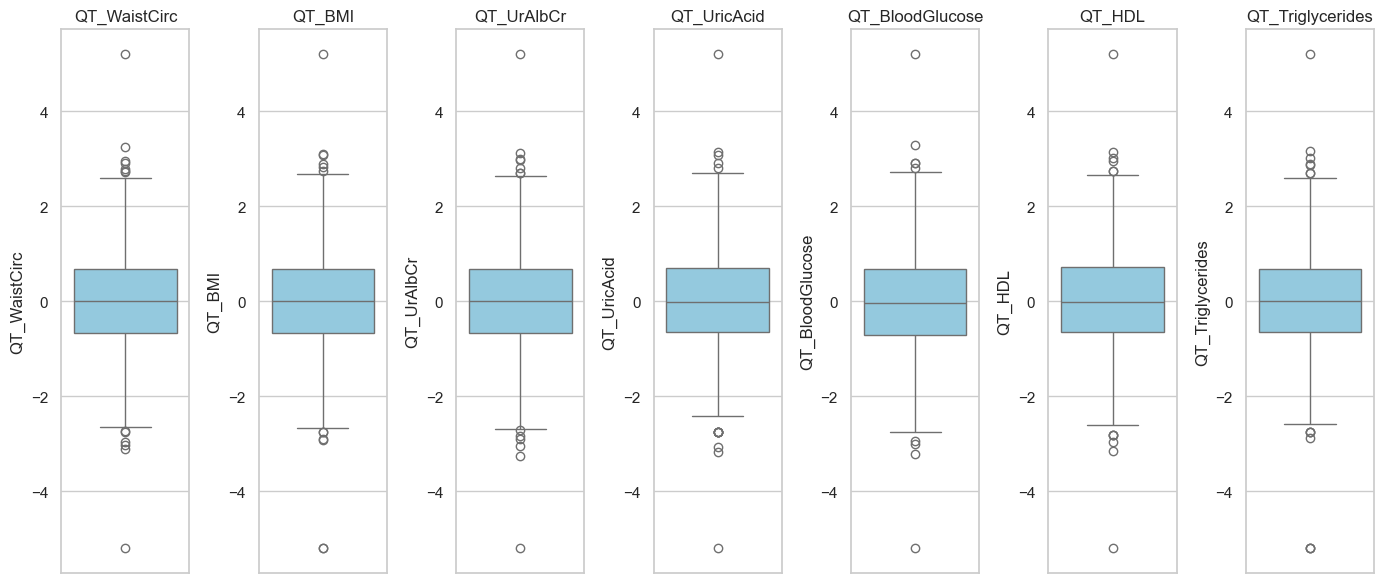

In [96]:
# 21. Draw boxplots for transformed variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your selected columns
cols = ['QT_WaistCirc', 'QT_BMI', 'QT_UrAlbCr', 'QT_UricAcid', 
        'QT_BloodGlucose', 'QT_HDL', 'QT_Triglycerides']

# Create boxplots
plt.figure(figsize=(14, 6))
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.boxplot(y=train_set_clean_transform[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()
plt.show()


In [97]:
# 22. Find outliers of transform variables
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Loop through each column and print outlier counts
for col in cols:
    outliers = find_outliers_iqr(train_set_clean_transform, col)
    print(f"{col}: {len(outliers)} outliers")


QT_WaistCirc: 13 outliers
QT_BMI: 12 outliers
QT_UrAlbCr: 13 outliers
QT_UricAcid: 14 outliers
QT_BloodGlucose: 9 outliers
QT_HDL: 12 outliers
QT_Triglycerides: 14 outliers


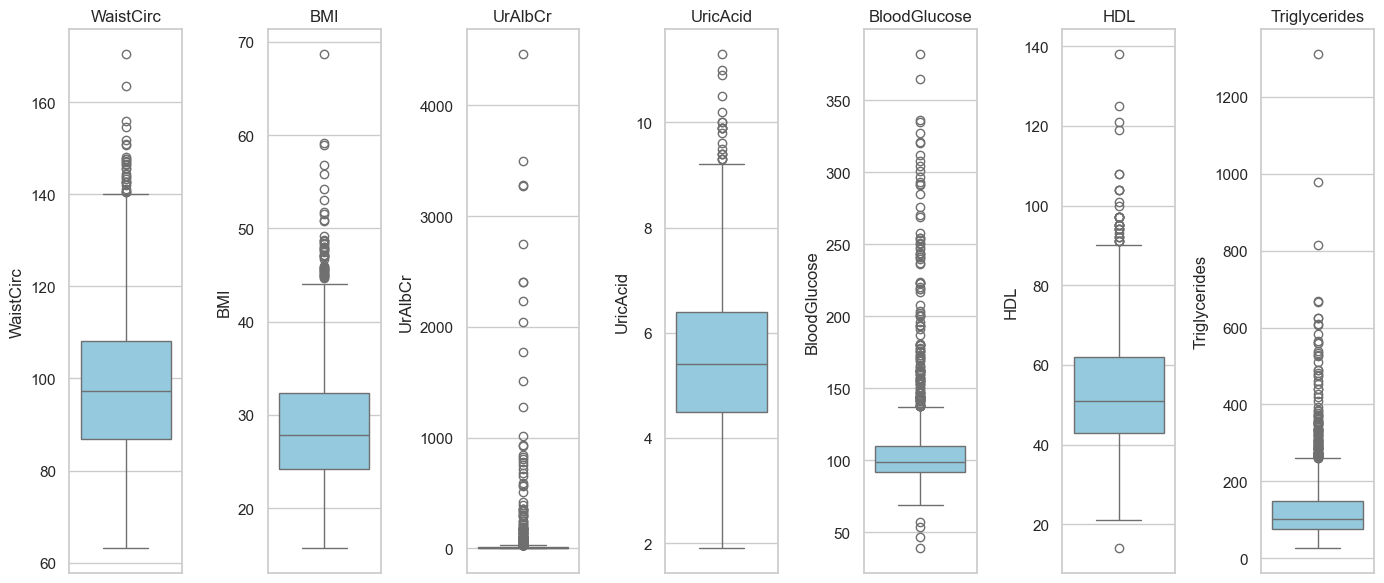

In [98]:
# 23. Draw boxplots for original variables
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Your selected columns
cols = ['WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid', 
        'BloodGlucose', 'HDL', 'Triglycerides']

# Create boxplots
plt.figure(figsize=(14, 6))
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)
    sns.boxplot(y=train_set_clean[col], color='skyblue')
    plt.title(col)
    plt.tight_layout()
plt.show()


In [99]:
# 24. Find outliers of original variables
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers

# Loop through each column and print outlier counts
for col in cols:
    outliers = find_outliers_iqr(train_set_clean, col)
    print(f"{col}: {len(outliers)} outliers")


WaistCirc: 28 outliers
BMI: 45 outliers
UrAlbCr: 218 outliers
UricAcid: 20 outliers
BloodGlucose: 136 outliers
HDL: 35 outliers
Triglycerides: 106 outliers


In [100]:
# 25. Remove outliers
# List of columns to check for outliers
cols = ['WaistCirc', 'BMI', 'UrAlbCr', 'UricAcid', 
        'BloodGlucose', 'HDL', 'Triglycerides']

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)].index

# Combine all outlier indices across columns
outlier_indices = set()
for col in cols:
    outliers = find_outliers_iqr(train_set_clean, col)
    outlier_indices.update(outliers)

print(f"Total rows with outliers across selected columns: {len(outlier_indices)}")
# Combine all outlier indices across columns
outlier_indices2 = set()
for col in cols:
    outliers = find_outliers_iqr(test_set_clean, col)
    outlier_indices2.update(outliers)

print(f"Total rows with outliers across selected columns: {len(outlier_indices2)}")


# Remove outliers
train_set_clean_transform_removed = train_set_clean_transform.drop(index=outlier_indices).reset_index(drop=True)


Total rows with outliers across selected columns: 434
Total rows with outliers across selected columns: 123


In [101]:
# 25. Remove outliers
# List of columns to check for outliers
cols = ['QT_WaistCirc', 'QT_BMI', 'QT_UrAlbCr', 'QT_UricAcid', 
        'QT_BloodGlucose', 'QT_HDL', 'QT_Triglycerides']

def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)].index

# Combine all outlier indices across columns
outlier_indices = set()
for col in cols:
    outliers = find_outliers_iqr(train_set_clean_transform, col)
    outlier_indices.update(outliers)

print(f"Total rows with outliers across selected columns: {len(outlier_indices)}")
# Combine all outlier indices across columns
outlier_indices2 = set()
for col in cols:
    outliers = find_outliers_iqr(test_set_clean_transform, col)
    outlier_indices2.update(outliers)

print(f"Total rows with outliers across selected columns: {len(outlier_indices2)}")


# Remove outliers
train_set_clean_transform_removed = train_set_clean_transform.drop(index=outlier_indices).reset_index(drop=True)


Total rows with outliers across selected columns: 80
Total rows with outliers across selected columns: 24


In [102]:
# 26. 
print("Original shape:", train_set_clean_transform.shape)
print("After outlier removal:", train_set_clean_transform_removed.shape)
print(train_set_clean_transform.dtypes)

Original shape: (1609, 15)
After outlier removal: (1529, 15)
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
dtype: object


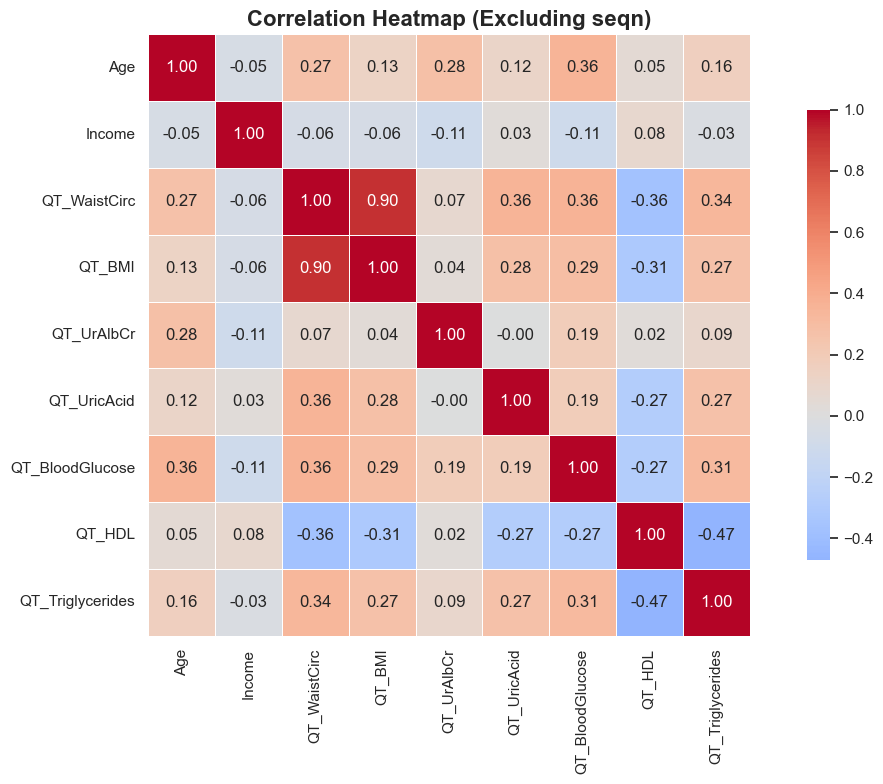

In [103]:
# 27. correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns and drop specified ones
numeric_df = train_set_clean_transform.select_dtypes(include='number').drop(columns=['seqn'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.75}
)

plt.title('Correlation Heatmap (Excluding seqn)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
dtype: object


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_7952\2470877051.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MetabolicSyndrome', y=col, data=train_set_clean_transform, palette="Set2")
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_7952\2470877051.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MetabolicSyndrome', y=col, data=train_set_clean_transform, palette="Set2")
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_7952\2470877051.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MetabolicSyndrom

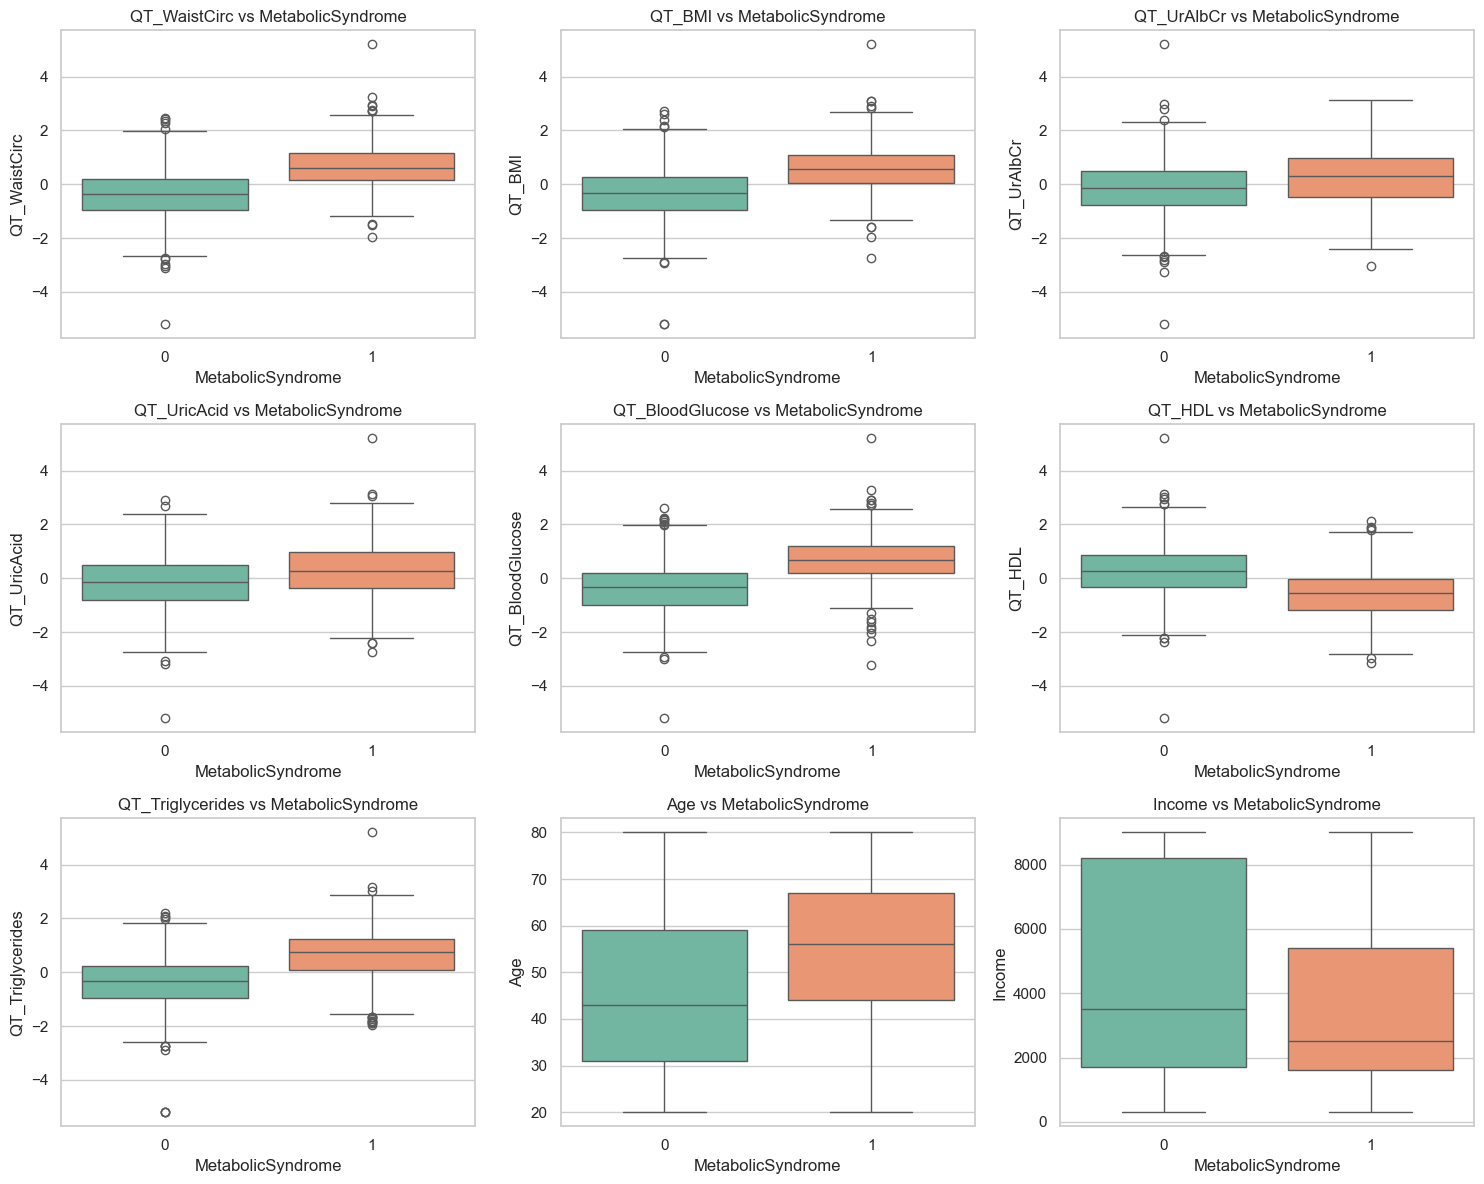

In [104]:
# 28. Bivariate analysis between MetabolicSyndrome vs numerical variables
print(train_set_clean_transform.dtypes)
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns to plot against MetabolicSyndrome
numerical_cols = ['QT_WaistCirc', 'QT_BMI', 'QT_UrAlbCr', 'QT_UricAcid', 
                  'QT_BloodGlucose', 'QT_HDL', 'QT_Triglycerides', 'Age', 'Income']

# Set figure size
plt.figure(figsize=(15, 12))

# Loop and create subplots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='MetabolicSyndrome', y=col, data=train_set_clean_transform, palette="Set2")
    plt.title(f'{col} vs MetabolicSyndrome')
    plt.xlabel('MetabolicSyndrome')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


<Axes: xlabel='Albuminuria', ylabel='QT_UrAlbCr'>

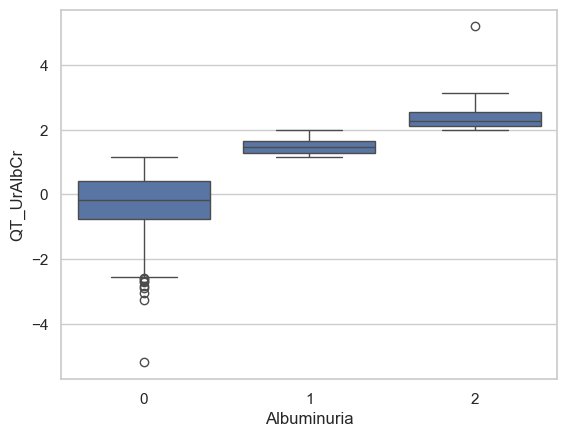

In [105]:
# 29. Relationship between Albuminuria vs QT_UrAlbCr
sns.boxplot(x='Albuminuria', y='QT_UrAlbCr', data=train_set_clean_transform)


In [106]:
# Group by 'Albuminuria' and get min and max of 'UrAlbCr'

min_max_summary = train_set.groupby('Albuminuria')['UrAlbCr'].agg(['min', 'max']).reset_index()
min_max_summary = test_set.groupby('Albuminuria')['UrAlbCr'].agg(['min', 'max']).reset_index()

# Display the result
print(min_max_summary)
print(min_max_summary)


  Albuminuria     min     max
0           0    1.46    27.5
1           1   30.21   250.0
2           2  319.15  5928.0
  Albuminuria     min     max
0           0    1.46    27.5
1           1   30.21   250.0
2           2  319.15  5928.0


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_7952\1057335162.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_max_summary = train_set.groupby('Albuminuria')['UrAlbCr'].agg(['min', 'max']).reset_index()
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_7952\1057335162.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_max_summary = test_set.groupby('Albuminuria')['UrAlbCr'].agg(['min', 'max']).reset_index()


In [107]:
# 30. find range of Age
min_age = train_set_clean_transform['Age'].min()
max_age = train_set_clean_transform['Age'].max()
age_range = max_age - min_age

print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
print(f"Age Range: {age_range}")


Minimum Age: 20
Maximum Age: 80
Age Range: 60


In [108]:
# 31. Categorized Age category
def categorize_age(age):
    if 20 <= age <= 39:
        return 'Young Adulthood'
    elif 40 <= age <= 59:
        return 'Middle Adulthood'
    elif 60 <= age <= 74:
        return 'Early Senior'
    elif age >= 75:
        return 'Later Senior'
    else:
        return 'Below 20'

# Apply function and create new column
train_set_clean_transform['AgeGroup'] = train_set_clean_transform['Age'].apply(categorize_age)
test_set_clean_transform['AgeGroup'] = test_set_clean_transform['Age'].apply(categorize_age)
# Convert to categorical (optional)
train_set_clean_transform['AgeGroup'] = train_set_clean_transform['AgeGroup'].astype('category')
test_set_clean_transform['AgeGroup'] = test_set_clean_transform['AgeGroup'].astype('category')

# Check the value counts
print(train_set_clean_transform['AgeGroup'].value_counts())
print(test_set_clean_transform['AgeGroup'].value_counts())


AgeGroup
Middle Adulthood    573
Young Adulthood     538
Early Senior        351
Later Senior        147
Name: count, dtype: int64
AgeGroup
Young Adulthood     130
Middle Adulthood    124
Early Senior        102
Later Senior         44
Name: count, dtype: int64


In [109]:
# 30. find range of Age
min_income = train_set_clean_transform['Income'].min()
max_income = train_set_clean_transform['Income'].max()
income_range = max_income - min_income

print(f"Minimum Income: {min_income}")
print(f"Maximum Income: {max_income}")
print(f"Income Range: {income_range}")


Minimum Income: 300.0
Maximum Income: 9000.0
Income Range: 8700.0


In [110]:
# 31. Categorized Age category
def categorize_income(income):
    if 0 <= income <= 2475:
        return 'Low Income'
    elif 2476 <= income <= 4651:
        return 'Lower-Middle'
    elif 4652 <= income <= 6827:
        return 'Upper-Middle'
    else:
        return 'High Income'

# Apply function and create new column
train_set_clean_transform['IncomeGroup'] = train_set_clean_transform['Income'].apply(categorize_income)
test_set_clean_transform['IncomeGroup'] = test_set_clean_transform['Income'].apply(categorize_income)
# Convert to categorical (optional)
train_set_clean_transform['IncomeGroup'] = train_set_clean_transform['IncomeGroup'].astype('category')
test_set_clean_transform['IncomeGroup'] = test_set_clean_transform['IncomeGroup'].astype('category')

# Check the value counts
print(train_set_clean_transform['IncomeGroup'].value_counts())
print(test_set_clean_transform['IncomeGroup'].value_counts())


IncomeGroup
Low Income      629
Lower-Middle    427
High Income     383
Upper-Middle    170
Name: count, dtype: int64
IncomeGroup
Low Income      130
Lower-Middle    118
High Income     104
Upper-Middle     48
Name: count, dtype: int64


In [111]:
# 32. 
print(train_set_clean_transform.dtypes)

seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
AgeGroup             category
IncomeGroup          category
dtype: object


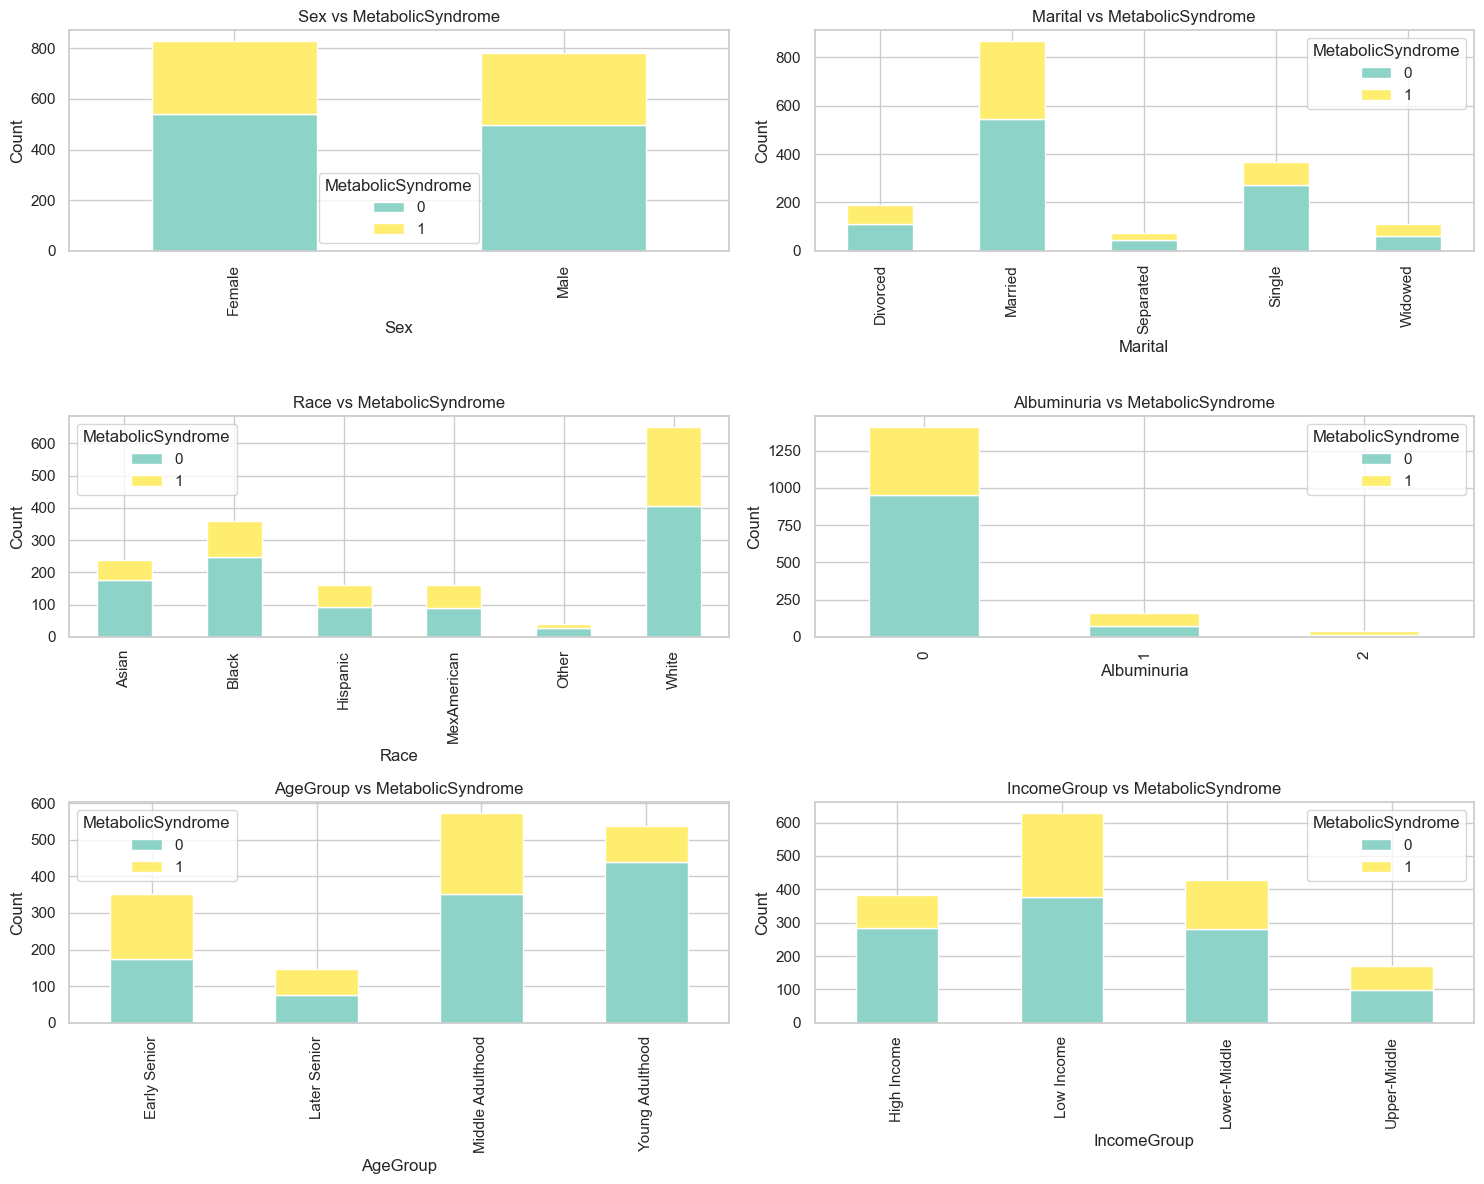

In [112]:
# 33. Stacked bar chart for categorical vs categorical

import pandas as pd
import matplotlib.pyplot as plt

# List of categorical variables to compare with MetabolicSyndrome
cat_vars = ['Sex', 'Marital', 'Race', 'Albuminuria', 'AgeGroup','IncomeGroup']

# Set figure size and layout
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
axes = axes.flatten()

# Loop through categorical variables
for i, var in enumerate(cat_vars):
    # Create crosstab (contingency table)
    ct = pd.crosstab(train_set_clean_transform[var], train_set_clean_transform['MetabolicSyndrome'])

    # Plot as stacked bar chart
    ct.plot(kind='bar', stacked=True, ax=axes[i], colormap='Set3')
    axes[i].set_title(f'{var} vs MetabolicSyndrome')
    axes[i].set_ylabel('Count')
    axes[i].legend(title='MetabolicSyndrome')

# Remove empty subplot if any
if len(cat_vars) < len(axes):
    for j in range(len(cat_vars), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


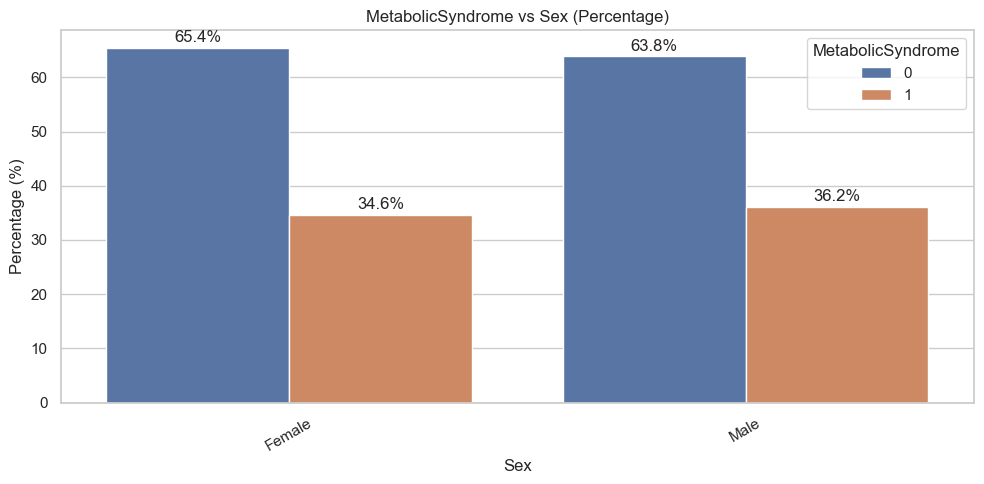

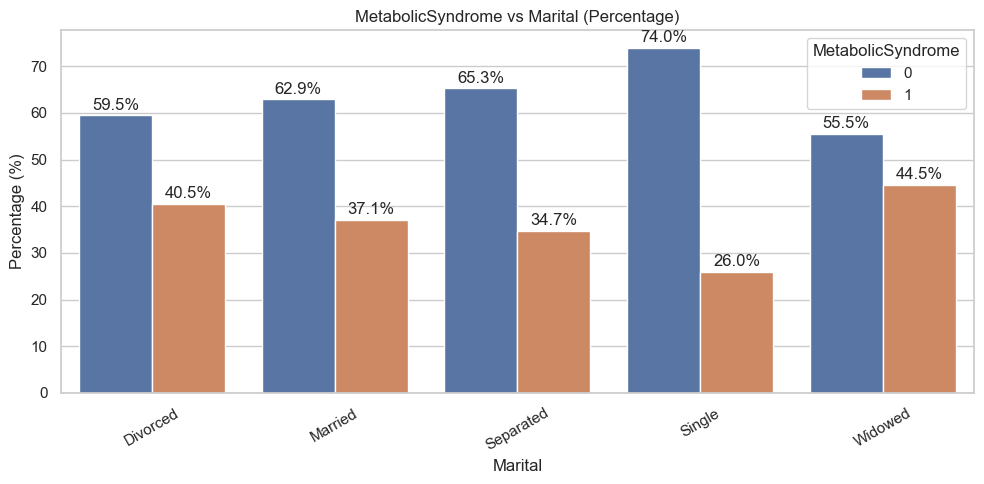

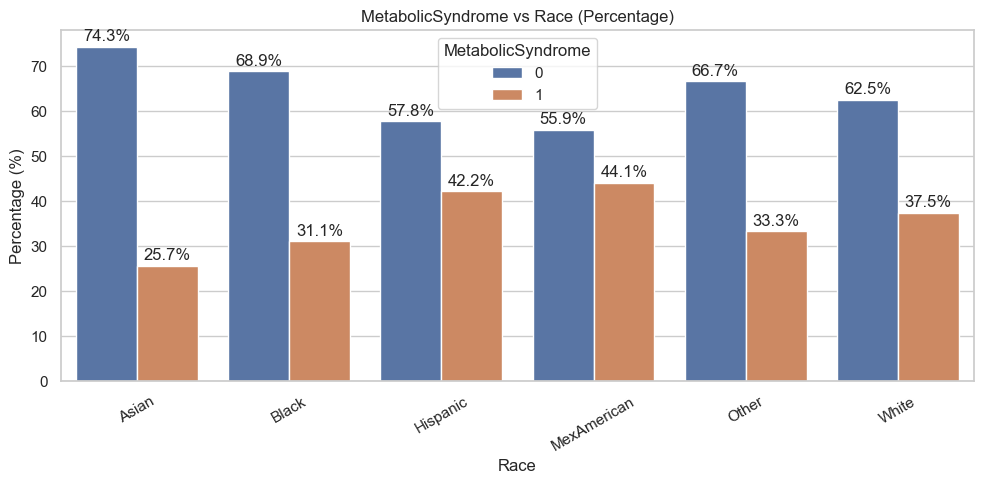

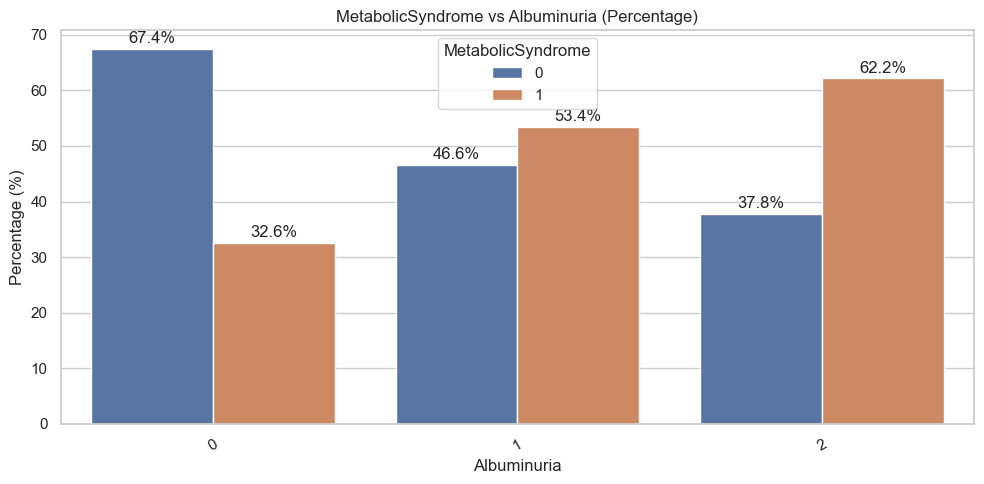

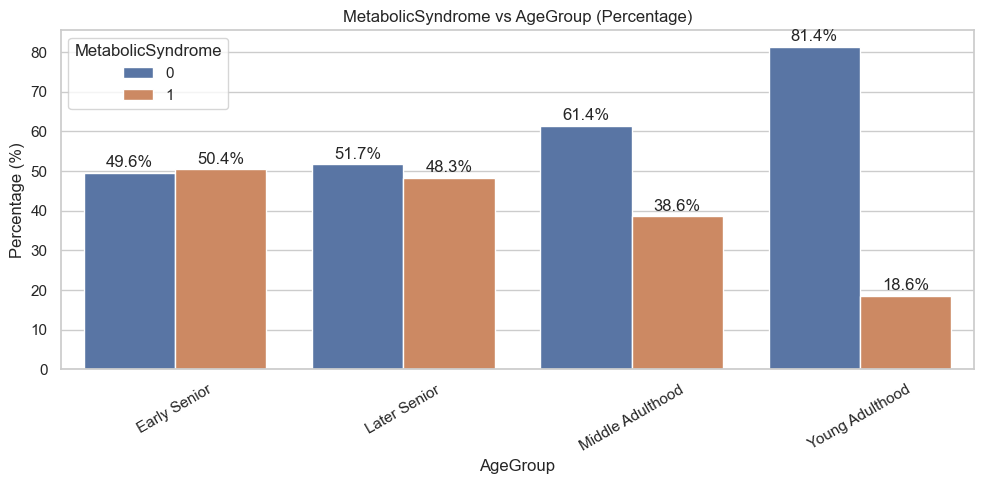

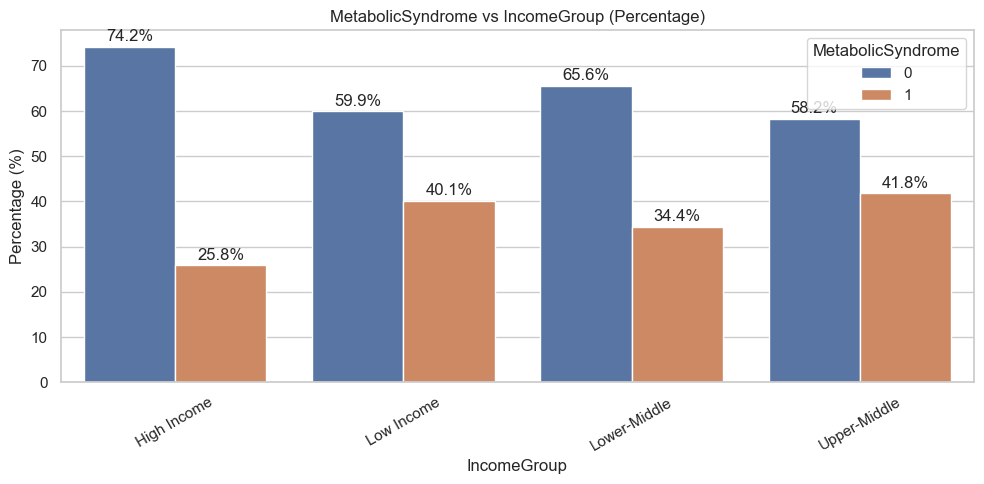

In [113]:
# 34. grouped bar chart for categorical vs categorical
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables to compare with MetabolicSyndrome
cat_vars = ['Sex', 'Marital', 'Race', 'Albuminuria', 'AgeGroup','IncomeGroup']

# Set plot style
sns.set(style="whitegrid")

# Loop through variables
for var in cat_vars:
    # Calculate percentages
    cross_tab = pd.crosstab(train_set_clean_transform[var], train_set_clean_transform['MetabolicSyndrome'], normalize='index') * 100
    df_plot = cross_tab.reset_index().melt(id_vars=var, var_name='MetabolicSyndrome', value_name='Percentage')
    
    # Plot grouped bar chart
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(x=var, y='Percentage', hue='MetabolicSyndrome', data=df_plot)

    # Annotate each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

    plt.title(f'MetabolicSyndrome vs {var} (Percentage)')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.legend(title='MetabolicSyndrome')
    plt.show()


In [114]:
# 35. FAMD
# For FAMD implementation
!pip install prince  
!pip install pandas scikit-learn

In [115]:
train_set_clean_transform = train_set_clean_transform.drop(['AgeGroup', 'IncomeGroup'], axis=1)

print(train_set_clean_transform.columns.tolist())


['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'Albuminuria', 'MetabolicSyndrome', 'QT_WaistCirc', 'QT_BMI', 'QT_UrAlbCr', 'QT_UricAcid', 'QT_BloodGlucose', 'QT_HDL', 'QT_Triglycerides']


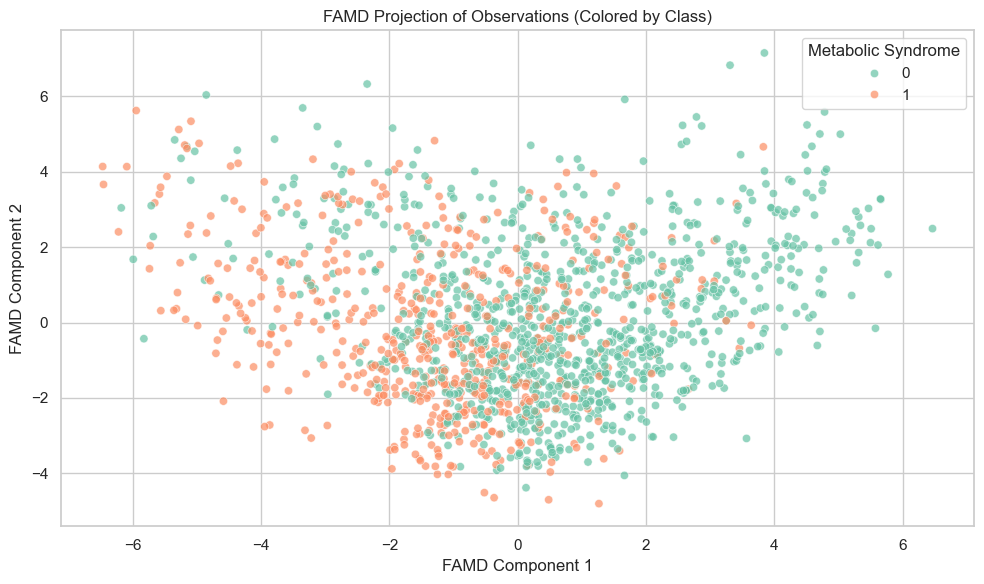

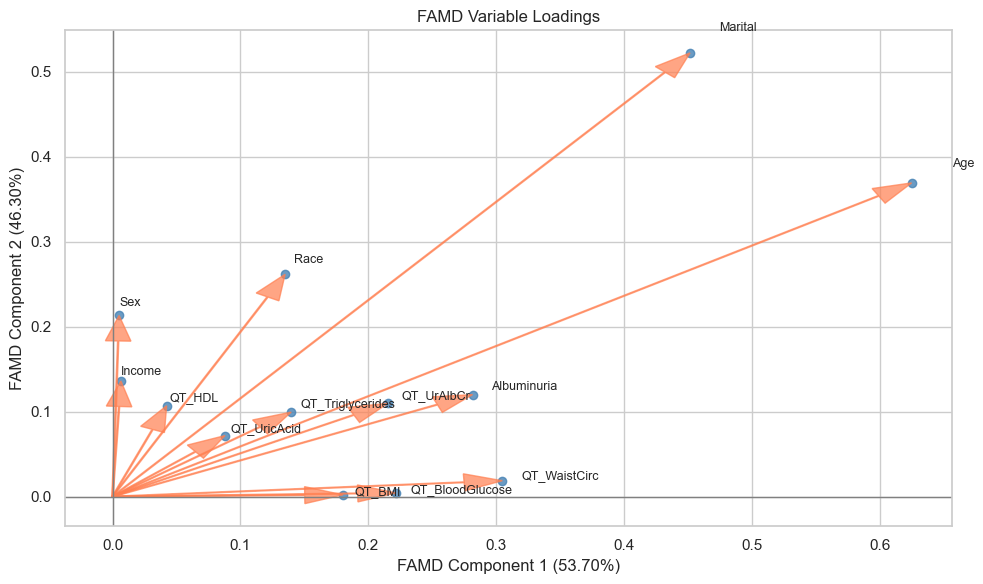

In [116]:
# 36. 
from prince import FAMD
import pandas as pd

# Separate features and target for both sets
# Training set
X_train = train_set_clean_transform.drop(['MetabolicSyndrome', 'seqn'], axis=1)
y_train = train_set_clean_transform['MetabolicSyndrome']

# Test set
X_test = test_set_clean_transform.drop(['MetabolicSyndrome', 'seqn'], axis=1)
y_test = test_set_clean_transform['MetabolicSyndrome']

# Make sure you have prince installed:
# pip install prince

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince

# --- 1. Prepare the data ---
# X_train: features only
# y_train: target
# cat_cols: list of categorical columns

famd_data = X_train.copy()
#famd_data[cat_cols] = famd_data[cat_cols].astype("category")  # Ensure correct types
famd_data["MetabolicSyndrome"] = y_train.values  # Add target for coloring

# --- 2. Initialize and Fit FAMD ---
famd = prince.FAMD(
    n_components=2,          # Just 2 components for visual plot
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

famd.fit(famd_data.drop(columns=["MetabolicSyndrome"]))

# --- 3. Row Projections (FAMD coordinates for samples) ---
row_coords = famd.row_coordinates(famd_data.drop(columns=["MetabolicSyndrome"]))
row_coords["MetabolicSyndrome"] = y_train.values

# Plot 2D projection of observations with color by class
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=row_coords[0], 
    y=row_coords[1], 
    hue=row_coords["MetabolicSyndrome"], 
    palette="Set2", 
    alpha=0.7
)
plt.xlabel("FAMD Component 1")
plt.ylabel("FAMD Component 2")
plt.title("FAMD Projection of Observations (Colored by Class)")
plt.grid(True)
plt.legend(title="Metabolic Syndrome", loc="best")
plt.tight_layout()
plt.show()

# --- 4. Variable Loadings ---
loadings = famd.column_coordinates_

plt.figure(figsize=(10, 6))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Plot each variable loading as a vector
for i in range(loadings.shape[0]):
    x, y = loadings.iloc[i, 0], loadings.iloc[i, 1]
    plt.scatter(x, y, color="steelblue", alpha=0.8)
    plt.arrow(0, 0, x, y, color="coral", alpha=0.7, head_width=0.02, length_includes_head=True)
    plt.text(x * 1.05, y * 1.05, loadings.index[i], fontsize=9)

# Estimate variance explained by each component (using row_coords)
explained_var = row_coords[[0, 1]].var() / row_coords[[0, 1]].var().sum()
var1 = explained_var[0] * 100
var2 = explained_var[1] * 100

plt.xlabel(f"FAMD Component 1 ({var1:.2f}%)")
plt.ylabel(f"FAMD Component 2 ({var2:.2f}%)")
plt.title("FAMD Variable Loadings")
plt.grid(True)
plt.tight_layout()
plt.show()


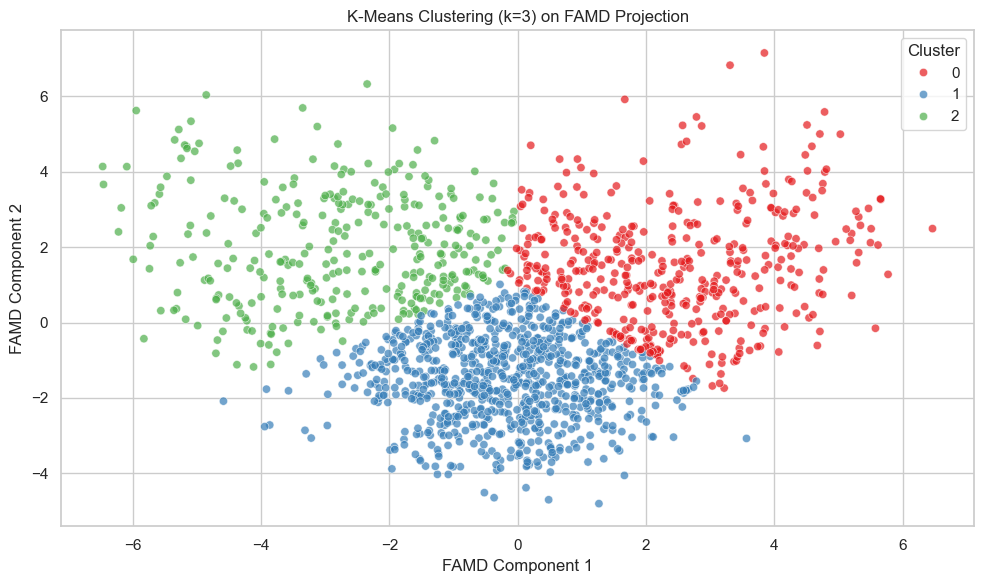

In [117]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import prince

# Step 1: Prepare data for FAMD (if not done already)
famd_data = X_train.copy()
#famd_data[cat_cols] = famd_data[cat_cols].astype('category')
famd_data['MetabolicSyndrome'] = y_train.values  # Optional, for coloring later if needed

# Step 2: Run FAMD (2 components for visualization)
famd = prince.FAMD(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

famd = famd.fit(famd_data.drop(columns=['MetabolicSyndrome']))
famd_coords = famd.row_coordinates(famd_data.drop(columns=['MetabolicSyndrome']))

# Step 3: Apply K-Means clustering
n_clusters = 3  # You can try other values like 2, 4, 5, etc.
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(famd_coords)

# Step 4: Add cluster labels
famd_coords['Cluster'] = cluster_labels

# Step 5: Plot clusters on FAMD projection
plt.figure(figsize=(10, 6))
sns.scatterplot(data=famd_coords, x=0, y=1, hue='Cluster', palette='Set1', alpha=0.7)
plt.xlabel('FAMD Component 1')
plt.ylabel('FAMD Component 2')
plt.title(f'K-Means Clustering (k={n_clusters}) on FAMD Projection')
plt.grid(True)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


For n_clusters = 2, Average Silhouette Score = 0.3324
For n_clusters = 3, Average Silhouette Score = 0.4140
For n_clusters = 4, Average Silhouette Score = 0.3269
For n_clusters = 5, Average Silhouette Score = 0.3416
For n_clusters = 6, Average Silhouette Score = 0.3434


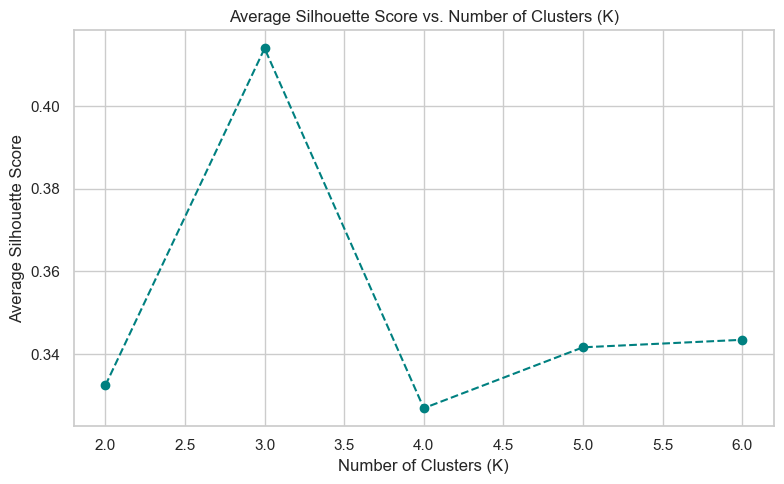

In [118]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Extract the 2D FAMD components
famd_2d = famd_coords[[0, 1]]  # Only the first two components

# Step 2: Define range of cluster numbers to try
range_n_clusters = list(range(2, 7))
silhouette_avgs = []

# Step 3: Loop through each k and compute silhouette scores
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(famd_2d)
    
    silhouette_avg = silhouette_score(famd_2d, cluster_labels)
    silhouette_avgs.append(silhouette_avg)
    
    print(f"For n_clusters = {n_clusters}, Average Silhouette Score = {silhouette_avg:.4f}")

# Step 4: Plot silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, silhouette_avgs, marker='o', linestyle='--', color='teal')
plt.title("Average Silhouette Score vs. Number of Clusters (K)")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Average Silhouette Score")
plt.grid(True)
plt.tight_layout()
plt.show()


In [119]:
# missing value imputation 
# 2. Check the dimension of the dataset
print("Dataset dimensions (rows, columns):", train_set_transform.shape)
print("Dataset dimensions (rows, columns):", test_set_transform.shape)

#check for missing values in each column

missing_values = train_set_transform.isnull().sum()
print(missing_values[missing_values > 0])

#check for missing values in each column

missing_values = test_set_transform.isnull().sum()
print(missing_values[missing_values > 0])

import pandas as pd
import numpy as np

# =============================================
# 1. MEAN IMPUTATION FOR QT VARIABLES
# =============================================

# Calculate means from training data
qt_waist_mean = train_set_transform['QT_WaistCirc'].mean()
qt_bmi_mean = train_set_transform['QT_BMI'].mean()

# Apply mean imputation to both datasets
for dataset in [train_set_transform, test_set_transform]:
    dataset['QT_WaistCirc'].fillna(qt_waist_mean, inplace=True)
    dataset['QT_BMI'].fillna(qt_bmi_mean, inplace=True)

# =============================================
# 2. REMOVE MISSING VALUES IN INCOME
# =============================================

# Remove rows with missing Income in both datasets
train_set_transform = train_set_transform.dropna(subset=['Income'])
test_set_transform = test_set_transform.dropna(subset=['Income'])

# =============================================
# 3. MODE IMPUTATION FOR MARITAL
# =============================================

# Calculate mode from training data
marital_mode = train_set_transform['Marital'].mode()[0]

# Apply mode imputation to both datasets
for dataset in [train_set_transform, test_set_transform]:
    dataset['Marital'].fillna(marital_mode, inplace=True)

# =============================================
# 4. VERIFICATION
# =============================================

print("\nAfter imputation - Training set missing values:")
print(train_set_transform.isnull().sum()[train_set_transform.isnull().sum() > 0])

print("\nAfter imputation - Test set missing values:")
print(test_set_transform.isnull().sum()[test_set_transform.isnull().sum() > 0])

print("\nNew dimensions:")
print("Train:", train_set_transform.shape)
print("Test:", test_set_transform.shape)
train_set_clean_transform = train_set_transform
test_set_clean_transform = test_set_transform

Dataset dimensions (rows, columns): (1920, 15)
Dataset dimensions (rows, columns): (481, 15)
Marital         165
Income           95
QT_WaistCirc     65
QT_BMI           23
dtype: int64
Marital         43
Income          22
QT_WaistCirc    20
QT_BMI           3
dtype: int64

After imputation - Training set missing values:
Series([], dtype: int64)

After imputation - Test set missing values:
Series([], dtype: int64)

New dimensions:
Train: (1825, 15)
Test: (459, 15)


C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_7952\4189357461.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['QT_WaistCirc'].fillna(qt_waist_mean, inplace=True)
C:\Users\Ashani Madushani\AppData\Local\Temp\ipykernel_7952\4189357461.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [120]:
train_set_clean_transform.to_csv('train_set_clean_transform.csv', index=False)
test_set_clean_transform.to_csv('test_set_clean_transform.csv', index=False)
